# **Indicadores Fundamentalistas - EUA**

In [ ]:
from empiricaldist import Cdf
from funcoes_eua import *
from matplotlib.patches import Patch
import plotly.express as px
import seaborn as sns

# **Índices**

In [ ]:
# S&P 500
spx = yf.download(
    '^GSPC', 
    start='2007-01-01',
    multi_level_index=False, 
    auto_adjust=True, 
    progress=False, 
)['Close']

# S&P 500 Equal Weight
spxew= yf.download(
    '^SPXEW', 
    start='2007-01-01',
    multi_level_index=False, 
    auto_adjust=True, 
    progress=False, 
)['Close']

# Calculando o retorno diário
spx_ret = spx.pct_change().dropna()
spxew_ret = spxew.pct_change().dropna()

# Calculando o retorno acumulado
spx_ret_acum = (1 + spx_ret).cumprod()
spxew_ret_acum = (1 + spxew_ret).cumprod()

# Selecionando o último preço de cada ano
spx_preco_anual = spx.groupby(spx.index.year).last().drop(2024)
spxew_preco_anual = spxew.groupby(spxew.index.year).last().drop(2024)

# Calculando o retorno anual
spx_ret_anual = round(((spx_preco_anual / spx_preco_anual.shift(1)) - 1) * 100, 2)
spxew_ret_anual = round(((spxew_preco_anual / spxew_preco_anual.shift(1)) - 1) * 100, 2)

# Removendo os NaN
spx_ret_anual = spx_ret_anual.dropna()
spxew_ret_anual = spxew_ret_anual.dropna()

# CDF dos ETFs (cumulative distribution function)
cdf_return_spx = Cdf.from_seq(spx_ret_anual)
cdf_return_spxew = Cdf.from_seq(spxew_ret_anual)

# Plotando os gráficos
fig = make_subplots(
    rows=3, 
    cols=1, 
    subplot_titles=('Preços', 'Retorno Acumulado', 'CDF'),
    vertical_spacing=0.1
)

# Gráfico de preço
fig.add_trace(go.Scatter(
    x=spx.index,
    y=spx.values, 
    name='S&P 500'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=spxew.index,
    y=spxew.values, 
    name='S&P 500 Equal Weight'),
    row=1, col=1
)

fig.update_xaxes(title_text='Anos', row=1, col=1)
fig.update_yaxes(title_text='Preço', row=1, col=1)

# Gráfico do retorno acumulado
fig.add_trace(go.Scatter(
    x=spx_ret_acum.index,
    y=spx_ret_acum.values, 
    name='spy_acum'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=spxew_ret_acum.index,
    y=spxew_ret_acum.values, 
    name='spxew_acum'),
    row=2, col=1
)

fig.update_xaxes(title_text='Anos', row=2, col=1)
fig.update_yaxes(title_text='Preço', row=2, col=1)

# Gráfico de CDF
fig.add_trace(go.Scatter(
    x=cdf_return_spx.index,
    y=cdf_return_spx,
    mode='lines+markers', 
    name='spy_cdf'),
    row=3, col=1
)

fig.add_trace(go.Scatter(
    x=cdf_return_spxew.index,
    y=cdf_return_spxew, 
    mode='lines+markers',
    name='spxew_cdf'),
    row=3, col=1
)

fig.update_xaxes(title_text='Retorno anual (%)', row=3, col=1)
fig.update_yaxes(title_text='CDF', row=3, col=1)

fig.update_layout(
    title='S&P 500 e S&P 500 Equal Weight',
    height=1200,
    template='seaborn'
)

fig.show()

In [ ]:
# Menor retorno anual
# quantities -> (qs)
menor_ret_spx = cdf_return_spx.qs[0]
menor_ret_spxew = cdf_return_spxew.qs[0]

# Probabilidade acumulado do menor retorno anual 
# probabilities -> (ps)
menor_ret_spx_prob_acum = cdf_return_spx.ps[0] * 100
menor_ret_spxew_prob_acum = cdf_return_spxew.ps[0] * 100

print(f'No S&P 500, há {menor_ret_spx_prob_acum:.2f}% de chance de o retorno anual da ação ser menor ou igual a {menor_ret_spx}%.')
print(f'No S&P 500 Equal Weight, há {menor_ret_spxew_prob_acum:.2f}% de chance de o retorno anual da ação ser menor ou igual a {menor_ret_spxew}%.')

**Growth vs Value**

In [ ]:
# Ishares S&P500 Value ETF
ive_preco = yf.download(
    'IVE', 
    start='2007-01-01',
    auto_adjust=True, 
    multi_level_index=False, 
    progress=False, 
)['Close']

# Ishares S&P500 Growth ETF
ivw_preco = yf.download(
    'IVW', 
    start='2007-01-01',
    auto_adjust=True, 
    multi_level_index=False, 
    progress=False, 
)['Close']

# Calculando o retorno diário
ive_ret = ive_preco.pct_change().dropna()
ivw_ret = ivw_preco.pct_change().dropna()

# Calculando o retorno acumulado
ive_ret_acum = (1 + ive_ret).cumprod()
ivw_ret_acum = (1 + ivw_ret).cumprod()

# Selecionando o último preço de cada ano
ive_preco_anual = ive_preco.groupby(ive_preco.index.year).last()
ivw_preco_anual = ivw_preco.groupby(ivw_preco.index.year).last()

# Calculando o retorno anual
ive_ret_anual = round(((ive_preco_anual / ive_preco_anual.shift(1)) - 1) * 100, 2)
ivw_ret_anual = round(((ivw_preco_anual / ivw_preco_anual.shift(1)) - 1) * 100, 2)

# Removendo os NaN
ive_ret_anual = ive_ret_anual.dropna()
ivw_ret_anual = ivw_ret_anual.dropna()

# CDF dos ETFs (cumulative distribution function)
cdf_return_ive = Cdf.from_seq(ive_ret_anual)
cdf_return_ivw = Cdf.from_seq(ivw_ret_anual)

# Plotando os gráficos 
fig = make_subplots(
    rows=3, 
    cols=1, 
    subplot_titles=('Preços', 'Retorno Acumulado', 'CDF'),
    vertical_spacing=0.1
)

# Gráfico de preço
fig.add_trace(go.Scatter(
    x=ive_preco.index, 
    y=ive_preco.values,  
    name='IVE'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=ivw_preco.index, 
    y=ivw_preco.values,  
    name='IVW'),
    row=1, col=1
)

fig.update_xaxes(title_text='Anos', row=1, col=1)
fig.update_yaxes(title_text='Preço', row=1, col=1)

# Gráfico do retorno acumulado
fig.add_trace(go.Scatter(
    x=ive_ret_acum.index, 
    y=ive_ret_acum.values, 
    name='IVE_acum'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=ivw_ret_acum.index, 
    y=ivw_ret_acum.values, 
    name='IVW_acum'),
    row=2, col=1
)

fig.update_xaxes(title_text='Anos', row=2, col=1)
fig.update_yaxes(title_text='Preço', row=2, col=1)

# Gráfico de CDF
fig.add_trace(go.Scatter(
    x=cdf_return_ive.index,
    y=cdf_return_ive, 
    mode='lines+markers',
    name='IVE_cdf'),
    row=3, col=1
)

fig.add_trace(go.Scatter(
    x=cdf_return_ivw.index,
    y=cdf_return_ivw, 
    mode='lines+markers',
    name='IVW_cdf'),
    row=3, col=1
)

fig.update_xaxes(title_text='Retorno anual (%)', row=3, col=1)
fig.update_yaxes(title_text='CDF', row=3, col=1)

fig.update_layout(
    title='IVE e IVW', 
    height=1200
)

fig.show()

In [ ]:
# Menor retorno anual
# quantities -> (qs)
menor_ret_ive = cdf_return_ive.qs[0]
menor_ret_ivw = cdf_return_ivw.qs[0]

# Probabilidade acumulado do menor retorno anual 
# probabilities -> (ps)
menor_ret_ive_prob_acum = cdf_return_ive.ps[0] * 100
menor_ret_ivw_prob_acum = cdf_return_ivw.ps[0] * 100

print(f'No IVE, há {menor_ret_ive_prob_acum:.2f}% de chance de o retorno anual da ação ser menor ou igual a {menor_ret_ive}%.')
print(f'No IVW, há {menor_ret_ivw_prob_acum:.2f}% de chance de o retorno anual da ação ser menor ou igual a {menor_ret_ivw}%.')

# **Setor de Semicondutores**

## Indicadores Gerais

In [ ]:
lst_tickers = ['NVDA', 'AMD', 'INTC', 'MU', 'AVGO']

df_semicondutores = yf.download(
    lst_tickers, 
    start='2007-01-01', 
    auto_adjust=True, 
    multi_level_index=False
)['Close']

# Plotando os preços das empresas de semicondutores
fig = go.Figure()

for empresa in df_semicondutores:
    fig.add_trace(go.Scatter(
        x=df_semicondutores.index,
        y=df_semicondutores[empresa],
        name=empresa
))
    
fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Semicondutores',
    template='seaborn'
)

fig.show()

In [ ]:
# Retirando o NaN
df_semicondutores_2 = df_semicondutores.dropna()

# Momentum de um ano   
momentum = df_semicondutores_2 - df_semicondutores_2.shift(252)

# Retirando o NaN
momentum  = momentum .dropna()

# Plotando o momentum
fig = go.Figure()
for empresa in momentum:
    fig.add_trace(go.Scatter(
        x=momentum.index,
        y=momentum[empresa],
        name=empresa
    ))

fig.add_hline(y=0, line=dict(color='red', width=1))

fig.update_layout(
    title_text='Setor de Semicondutores - Momentum',
    template='seaborn',
)
fig.show()

In [ ]:
# Calculando a volatilidade anualizada de cada ação 
vol_anual = round(volatilidade(df=df_semicondutores, ticker=lst_tickers, ano='2025')[0] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_mensal = round(volatilidade(df=df_semicondutores, ticker=lst_tickers, ano='2025')[1] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_semanal = round(volatilidade(df=df_semicondutores, ticker=lst_tickers, ano='2025')[2] * 100, 2)

# Juntando todas as volatilidades em um df
df_volatilidade = pd.DataFrame({
    'vol_anual': [vol_anual], 
    'vol_mensal': [vol_mensal], 
    'vol_semanal': [vol_semanal]
})

# Plotando as volatilidades
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_volatilidade.columns,
    y=df_volatilidade.values[0]
))

fig.update_layout(
    title_text='Setor de Semicondutores - Volatilidade',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Gráfico da volatilidade histórica ao longo do tempo

# Calculando o retorno logarítmico
log_return = np.log(df_semicondutores.loc['2021':'2025', lst_tickers] / df_semicondutores.loc['2021':'2025', lst_tickers].shift(1))  #usar o dropna() se o gráfico ficar com "buracos" entre os anos.

# Calculando a volatilidade média móvel de 60
volatilidade_movel = log_return.rolling(window=60).std()*np.sqrt(60)

# Retirando o NaN
volatilidade_movel = volatilidade_movel.dropna()

px.line(data_frame=volatilidade_movel, 
        x=volatilidade_movel.index, 
        y=volatilidade_movel.columns).update_layout(
            title='Setor de Semicondutores - Evolução da Volatilidade Móvel', 
            xaxis_title='Anos', 
            yaxis_title='Volatilidade', 
            template='seaborn'
)

In [ ]:
# Cria uma figura e uma grade de subplots 1x2
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Correlação dos semicondutores
sns.heatmap(df_semicondutores.corr(), ax=axs[0], annot=True, cmap='coolwarm');
axs[0].set_title('Setor de Semicondutores - Matriz de Correlação', fontsize=16)

# Transformando a correlação em uma métrica
metrica = df_semicondutores.corr().apply(lambda x: np.sqrt(0.5 * (1 - x)))
metrica = metrica.dropna()

# Utilizando a função 'cluster_corr' que reorganiza a matriz de correlação, de modo que grupos de variáveis altamente correlacionadas fiquem próximas umas das outras
sns.heatmap(cluster_corr(metrica), ax=axs[1], annot=True, cmap='coolwarm');
axs[1].set_title('Setor de Semicondutores - Matriz de Correlação Ajustada')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Calculando o drawdown de cada ação do setor

# Calculando o retorno diário
ret_semicondutores = df_semicondutores.pct_change().dropna()

# Aplicando a função 'drawdown'
max_drawdown = ret_semicondutores.apply(drawdown, axis=0)

# Filtrando os drawdowns dos maiores p/ os menores
max_drawdown = max_drawdown.sort_values(ascending=True) * 100

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_drawdown.index,
    y=max_drawdown.values
))

fig.update_layout(
    title_text='Setor de Semicondutores - Drawdown',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Calculando o retorno acumulado
ret_accum = (1 + ret_semicondutores).cumprod()

# Primeiro dia começa em 1
ret_accum.iloc[0] = 1

# Plotando o retorno acumulado
fig = go.Figure()

for empresa in ret_accum:
    fig.add_trace(go.Scatter(
        x=ret_accum.index,
        y=ret_accum[empresa],
        name=empresa
    ))

fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Semicondutores - Retorno Acumulado',
    template='seaborn'
)

fig.show()

In [ ]:
# Selecionando o último preço de cada ano e retirando o ano vigente
df_semicondutores_anual = df_semicondutores.groupby(df_semicondutores.index.year).last().drop(df_semicondutores.index.year.unique()[-1])

# Calculando o retorno anual
df_ret_anual_semicondutores = ((df_semicondutores_anual / df_semicondutores_anual.shift(1)) - 1) * 100

# Arrendondamento das casas decimais
df_ret_anual_semicondutores = df_ret_anual_semicondutores.round(2)

plt.figure(figsize=(20, 10))
sns.heatmap(df_ret_anual_semicondutores, annot=True, cmap='Blues', fmt=".2f", linewidths=0.8)
plt.title('Setor de Semicondutores - Retorno Anual')
plt.show()

In [ ]:
# Plotando os histogramas dos retornos logarítmicos
plot_indicators_subplot_histogram(df_setor=df_semicondutores, setor='semicondutores')

In [ ]:
# Plot do qqplot das empresas
qqplot = subplot_qqplot(df_setor=df_semicondutores)
qqplot

In [ ]:
# Fazendo uma cópia do df
df_copy = df_semicondutores.copy()

# Retirando os NaN para que a data inicial seja igual para todas as empresas
df_copy = df_copy.dropna()

# Número de anos
num_years = len(df_copy.index.year.unique())

df_copy.loc[:, 'NVDA'][0]

In [ ]:
nvda_cagr = round(cagr(start_value=df_copy.loc[:, 'NVDA'].iloc[0], end_value=df_copy.loc[:, 'NVDA'].iloc[-1], num_periods=num_years) * 100, 2)

In [ ]:
# Fazendo uma cópia do df
df_copy = df_semicondutores.copy()

# Retirando os NaN para que a data inicial seja igual para todas as empresas
df_copy = df_copy.dropna()

# Número de anos
num_years = len(df_copy.index.year.unique())

# Calculando o CAGR (Compound Annual Growth Rate)
nvda_cagr = round(cagr(start_value=df_copy.loc[:, 'NVDA'].iloc[0], end_value=df_copy.loc[:, 'NVDA'].iloc[-1], num_periods=num_years) * 100, 2)
amd_cagr = round(cagr(start_value=df_copy.loc[:, 'AMD'].iloc[0], end_value=df_copy.loc[:, 'AMD'].iloc[-1], num_periods=num_years) * 100, 2)
intc_cagr = round(cagr(start_value=df_copy.loc[:, 'INTC'].iloc[0], end_value=df_copy.loc[:, 'INTC'].iloc[-1], num_periods=num_years) * 100, 2)
micron_cagr = round(cagr(start_value=df_copy.loc[:, 'MU'].iloc[0], end_value=df_copy.loc[:, 'MU'].iloc[-1], num_periods=num_years) * 100, 2)
broadcom_cagr = round(cagr(start_value=df_copy.loc[:, 'AVGO'].iloc[0], end_value=df_copy.loc[:, 'AVGO'].iloc[-1], num_periods=num_years) * 100, 2)

# Juntando todas os CAGR em um df
df_cagr = pd.DataFrame({
    'NVDA':nvda_cagr,
    'AMD':amd_cagr,
    'INTC':intc_cagr,
    'MU':micron_cagr,
    'AVGO':broadcom_cagr
}, index=[num_years])

# Transpondo o df
df_cagr = df_cagr.T
df_cagr.columns = ['cagr']

# Plotando o cagr
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_cagr.index,
    y=df_cagr['cagr'],
))

fig.update_layout(
    title_text=f'Setor de Semicondutores - CAGR de {num_years} anos',
    template='seaborn'
)

fig.show()

In [ ]:
# Calculando o beta das empresas
beta_nvda, model_nvda = calculate_beta(index='^GSPC', stock='NVDA', period='3y', interval='1wk')
beta_amd, model_amd = calculate_beta(index='^GSPC', stock='AMD', period='3y', interval='1wk')
beta_intc, model_intc = calculate_beta(index='^GSPC', stock='INTC', period='3y', interval='1wk')
beta_micron, model_micron = calculate_beta(index='^GSPC', stock='MU', period='3y', interval='1wk')
beta_broadcom, model_broadcom = calculate_beta(index='^GSPC', stock='AVGO', period='3y', interval='1wk')

# Juntando em um dicionário
dict_beta = {   
    'NVDA':beta_nvda, 
    'AMD':beta_amd, 
    'INTC':beta_intc, 
    'MU':beta_micron, 
    'AVGO':beta_broadcom
}

# Transformando em um DataFrame
df_beta = pd.DataFrame(list(dict_beta.items()), columns=['Empresa', 'Beta'])

# Plot dos betas das empresas em uma linha horizontal ('régua')
cores_beta = ['red', 'blue', 'green', 'purple', 'orange']
valores = np.arange(0, 10, 1)  # Valores de 0 a 10 com passos de 1

# Tamanho do plot
fig, ax = plt.subplots(figsize=(15, 3))
# Adicionando um título ao gráfico
ax.set_title('Setor de Semicondutores - Beta', loc='left', fontsize=16)
# Criando uma barra horizontal que representa a régua
ax.barh(y=0, width=100, height=0.1, color='lightgrey', edgecolor='black')

# Adicionando ticks e labels
ax.set_xticks(valores)
ax.set_xticklabels(valores)
ax.set_yticks([])  # Remove y-ticks
ax.set_xlim(0, 3)
ax.set_ylim(-1, 1)

# Adicionando linhas verticais para cada valor (ticks da régua)
for valor in valores:
    ax.axvline(valor, color='black', linestyle='--', ymin=0.3, ymax=0.7)

# Removendo o eixo y
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Adicionando números de beta acima e abaixo da linha horizontal
for i, (beta, empresa, cor) in enumerate(zip(df_beta['Beta'], df_beta['Empresa'], cores_beta)):
    ax.plot(beta, 0, 'o', color=cor)
    # Ajustando a posição vertical dos números de beta
    if i % 3 == 0:
        offset = 0.2
    else:
        offset = -0.4
    ax.text(beta, offset, f'{beta:.2f}', ha='center', color=cor, fontsize=12, rotation=90)  # Rótulo do beta acima ou abaixo da linha

# Criando uma legenda manualmente
handles = [Patch(facecolor=cor, edgecolor='black') for cor in cores_beta]
ax.legend(handles, df_beta['Empresa'], loc='upper left', bbox_to_anchor=(1.03, 1.1))

# Exibir o gráfico
plt.show()

In [ ]:
# Plotando o grafico da relação risco x retorno
plot_risk_return(df_setor=df_semicondutores, setor='semicondutores')

In [ ]:
# VaR histórico
df_var_hist = VaR(df_setor=df_semicondutores)[0]

# Plotando o VaR histórico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_90'],
    name='VaR_hist_90'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_95'],
    name='VaR_hist_95'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_99'],
    name='VaR_hist_99'
))

fig.update_layout(
    title='Setor de Semicondutores - VaR Histórico'
)

fig.show()

In [ ]:
# VaR paramétrico (gaussiano)
df_var_param = VaR(df_setor=df_semicondutores)[1]

# Plotando o VaR paramétrico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_90'],
    name='VaR_param_90'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_95'],
    name='VaR_param_95'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_99'],
    name='VaR_param_99'
))

fig.update_layout(
    title='Setor de Semicondutores - VaR Paramétrico'
)

fig.show()

In [ ]:
# CVaR ou Expected Shortfall
df_cvar = CVaR(df_setor=df_semicondutores)

# Plotando o CVaR 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_90'],
    name='CVaR_90'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_95'],
    name='CVaR_95'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_99'],
    name='CVaR_99'
))

fig.update_layout(
    title='Setor de Semicondutores - CVaR'
)

fig.show()

In [ ]:
# VaR e CVaR - utilizando a distribuição student-t
var_cvar_t_90 = VaR_CVaR_scipy(df_setor=df_semicondutores, num_alpha=0.1, tipo_distrib='student-t')
var_cvar_t_95 = VaR_CVaR_scipy(df_setor=df_semicondutores, num_alpha=0.05, tipo_distrib='student-t')
var_cvar_t_99 = VaR_CVaR_scipy(df_setor=df_semicondutores, num_alpha=0.01, tipo_distrib='student-t')

# Plotando o VaR e CVaR - distribuição student-t
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'VaR e CVaR 90 - distribuição student-t',
        'VaR e CVaR 95 - distribuição student-t',
        'VaR e CVaR 99 - distribuição student-t'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['VaR_t_90'],
    name='VaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['CVaR_t_90'],
    name='CVaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['VaR_t_95'],
    name='VaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['CVaR_t_95'],
    name='CVaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['VaR_t_99'],
    name='VaR_t_99'),
    col=1, row=3)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['CVaR_t_99'],
    name='CVaR_t_99'),
    col=1, row=3)

fig.update_layout(
    title='Setor de Semicondutores - distribuição student-t',
    height=900
)

fig.show()

In [ ]:
# Retirandos os NaN do df
df_semicondutores_2 = df_semicondutores.dropna()

# Dicionário p/ criar um df dos coeficientes de Hurst
dict_hurst = {}

# Lista das lags
lst_lags = [20, 50, 100, 200, 500]

# Calculando o coefiente de Hurst
for empresa in df_semicondutores_2:
    lst_hurst = []
    for lag in lst_lags:
        hurst_exp = hurst_exponent(df_semicondutores_2[empresa].values, lag)
        hurst_exp = round(hurst_exp, 2)
        lst_hurst.append(hurst_exp)
    dict_hurst[empresa] = lst_hurst

# Criando um df a partir do dicionário
df_hurst = pd.DataFrame(dict_hurst, index=lst_lags)

# Transpondo o df
df_hurst = df_hurst.T

# Plotando o coeficiente de Hurst
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'Coeficiente de Hurst - lag 20',
        'Coeficiente de Hurst - lag 50',
        'Coeficiente de Hurst - lag 100'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[20],
    name='lag_20'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[50],
    name='lag_50'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[100],
    name='lag_100'),
    row=3, col=1
)

fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=1, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=2, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=3, col=1)

fig.update_layout(
    title='Setor de Semicondutores - Coeficiente de Hurst',
    height=900
)

fig.show()

## Indicadores Fundamentalistas

In [ ]:
# Lendo os arquivos excel 10-K
df_nvda_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//nvidia//nvda_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_amd_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//amd//amd_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_intc_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//intel//intc_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_mu_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//micron//mu_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_avgo_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//broadcom//avgo_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

# Lendo os arquivos excel 10-Q
df_nvda_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//nvidia//nvda_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_amd_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//amd//amd_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_intc_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//intel//intc_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_mu_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//micron//mu_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_avgo_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//semicondutores//broadcom//avgo_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

In [ ]:
# Lista que contém tuplas que possuem o nome da empresa e o seu df com os indicadores fundamentalistas
lst_empresas_10k = [
    ('Nvidia', df_nvda_fundamental_indicators),
    ('AMD', df_amd_fundamental_indicators),
    ('Intel', df_intc_fundamental_indicators),
    ('Micron', df_mu_fundamental_indicators),
    ('Broadcom', df_avgo_fundamental_indicators)
]

lst_empresas_10q = [
    ('Nvidia', df_nvda_fundamental_indicators_10q),
    ('AMD', df_amd_fundamental_indicators_10q),
    ('Intel', df_intc_fundamental_indicators_10q),
    ('Micron', df_mu_fundamental_indicators_10q),
    ('Broadcom', df_avgo_fundamental_indicators_10q)
]

# Lista que contém os nomes dos indicadores fundamentalistas
indicadores_scatter = [
    'P/L Damodaran', 
    'P/L', 
    'L/P',
    'EBITDA', 
    'Margem Líquida',
    'P/VPA',
    'Dívida Líquida/EBITDA',
    'Dívida Líquida/PL',
    'EV/EBITDA',
    'ROE',
    'ROIC',
    'FCO',
    'Free Cash Flow',
    'Buyback'
]

indicadores_bar = [
    'Valor de Mercado',
    'Dívida Bruta',
    'Caixa e Equivalentes',
    'Dívida Líquida'
]

In [ ]:
# Plotando os indicadores fundamentalistas 10-k 
plot_indicators_subplot_scatter(
    ten_k=True, 
    lst_dfs=lst_empresas_10k, 
    indicadores=indicadores_scatter, 
    setor='semicondutores'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-q
plot_indicators_subplot_scatter(
    ten_k=False, 
    lst_dfs=lst_empresas_10q, 
    indicadores=indicadores_scatter, 
    setor='semicondutores'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-k 
plot_indicators_subplot_bar(
    lst_dfs=lst_empresas_10k, 
    indicadores=indicadores_bar, 
    setor='semicondutores'
)

In [ ]:
# Plotando o indicador 'Valor de Mercado' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Valor de Mercado',
    setor='semicondutores'
)

In [ ]:
# Plotando o indicador 'Dívida Bruta' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Dívida Bruta',
    setor='semicondutores'
)

In [ ]:
# Plotando o indicador 'Caixa e Equivalentes' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Caixa e Equivalentes',
    setor='semicondutores'
)

In [ ]:
# Plotando o indicador 'Dívida Líquida' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Dívida Líquida',
    setor='semicondutores'
)

# **Setor de Energia Elétrica**

## Geradoras com Energia Nuclear

### Indicadores Gerais

In [ ]:
# Lista das empresas geradoras com energia nuclear dos EUA
lst_ticker_geradoras_nucleares = [
    'CEG', # Constellation 
    'VST', # Vistra
    'TLN', # Talen
    'OKLO', # Oklo
    # 'DUK', # Duke Energy
    # 'NEE', # NextEra
    # 'PEG', # Public Service Enterprise
    # 'SO',  # The Southern Company
    # 'AEP', # American Electric Power
    # 'PNW', # Pinnacle West Capital 
    # 'D',   # Dominion Energy
    # 'ETR', # Entergy Corp
    # 'DTE', # DTE Energy
    # 'PCG', # PG&E Corp
    # 'AEE', # Ameren Corp
    # 'EXC', # Exelon
    # 'XEL'  # Xcel Energy
]

# Preços de fechamento das geradoras com energia nuclear dos EUA
df_geradoras_nucleares = yf.download(lst_ticker_geradoras_nucleares, start='2017-01-01', auto_adjust=True, multi_level_index=False)['Close']

# Plotando os preços das empresas de energia elétrica
fig = go.Figure()

for empresa in df_geradoras_nucleares:
    fig.add_trace(go.Scatter(
        x=df_geradoras_nucleares.index,
        y=df_geradoras_nucleares[empresa],
        name=empresa
))
    
fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Energia Elétrica com Energia Nuclear',
    template='seaborn'
)

fig.show()

In [ ]:
# Retirando o NaN
df_geradoras_nucleares_2 = df_geradoras_nucleares.dropna()

# Momentum de um ano   
momentum = df_geradoras_nucleares_2 - df_geradoras_nucleares_2.shift(252)

# Retirando o NaN
momentum = momentum.dropna()

# Plotando o momentum
fig = go.Figure()
for empresa in momentum:
    fig.add_trace(go.Scatter(
        x=momentum.index,
        y=momentum[empresa],
        name=empresa
    ))

fig.add_hline(y=0, line=dict(color='red', width=1))

fig.update_layout(
    title_text='Setor de Energia Elétrica com Energia Nuclear - Momentum',
    template='seaborn',
)
fig.show()

In [ ]:
# Calculando a volatilidade anualizada de cada ação 
vol_anual = round(volatilidade(df=df_geradoras_nucleares, ticker=lst_ticker_geradoras_nucleares, ano='2025')[0] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_mensal = round(volatilidade(df=df_geradoras_nucleares, ticker=lst_ticker_geradoras_nucleares, ano='2025')[1] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_semanal = round(volatilidade(df=df_geradoras_nucleares, ticker=lst_ticker_geradoras_nucleares, ano='2025')[2] * 100, 2)

# Juntando todas as volatilidades em um df
df_volatilidade = pd.DataFrame({
    'vol_anual': [vol_anual], 
    'vol_mensal': [vol_mensal], 
    'vol_semanal': [vol_semanal]
})

# Plotando as volatilidades
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_volatilidade.columns,
    y=df_volatilidade.values[0]
))

fig.update_layout(
    title_text='Setor de Energia Elétrica com Energia Nuclear - Volatilidade',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Gráfico da volatilidade histórica ao longo do tempo

# Calculando o retorno logarítmico
log_return = np.log(df_geradoras_nucleares.loc['2021':'2025', lst_ticker_geradoras_nucleares] / df_geradoras_nucleares.loc['2021':'2025', lst_ticker_geradoras_nucleares].shift(1)) 

# Calculando a volatilidade média móvel de 60
volatilidade_movel = log_return.rolling(window=60).std()*np.sqrt(60)

# Retirando o NaN
volatilidade_movel = volatilidade_movel.dropna()

px.line(data_frame=volatilidade_movel, 
        x=volatilidade_movel.index, 
        y=volatilidade_movel.columns).update_layout(
            title='Setor de Energia Elétrica com Energia Nuclear - Evolução da Volatilidade Móvel', 
            xaxis_title='Anos', 
            yaxis_title='Volatilidade', 
            template='seaborn'
)

In [ ]:
# Cria uma figura e uma grade de subplots 1x2
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Correlação das geradoras nucleares
sns.heatmap(df_geradoras_nucleares.corr(), ax=axs[0], annot=True, cmap='coolwarm');
axs[0].set_title('Setor de Energia Elétrica com Energia Nuclear - Matriz de Correlação', fontsize=16)

# Transformando a correlação em uma métrica
metrica = df_geradoras_nucleares.corr().apply(lambda x: np.sqrt(0.5 * (1 - x)))
metrica = metrica.dropna()

# Utilizando a função 'cluster_corr' que reorganiza a matriz de correlação, de modo que grupos de variáveis altamente correlacionadas fiquem próximas umas das outras
sns.heatmap(cluster_corr(metrica), ax=axs[1], annot=True, cmap='coolwarm');
axs[1].set_title('Setor de Energia Elétrica com Energia Nuclear - Matriz de Correlação Ajustada')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Calculando o drawdown de cada ação do setor

# Calculando o retorno diário
ret_geradoras_nucleares = df_geradoras_nucleares.pct_change().dropna()

# Aplicando a função 'drawdown'
max_drawdown = ret_geradoras_nucleares.apply(drawdown, axis=0)

# Filtrando os drawdowns dos maiores p/ os menores
max_drawdown = max_drawdown.sort_values(ascending=True) * 100

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_drawdown.index,
    y=max_drawdown.values
))

fig.update_layout(
    title_text='Setor de Energia Elétrica com Energia Nuclear - Drawdown',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# As empresas geradoras com energia nuclear estavam em uma tendência de alta, porém com tarifaço do Trump no mundo, todas cairam (movimento de Janeiro a Abril de 2025)
# No final de Abril/25, Trump começou a falar que as tarifas vão diminuir, principalmente na China
lst_pct_change_tarifaco = []

for empresa in df_geradoras_nucleares.columns:
    preco_max_tarifaco = round(df_geradoras_nucleares.loc['2025-01':'2025-04', empresa].max(), 2)
    preco_min_tarifaco = round(df_geradoras_nucleares.loc['2025-01':'2025-04', empresa].min(), 2)
    pct_change_tarifaco = round(((preco_min_tarifaco / preco_max_tarifaco) - 1) * 100, 2)
    lst_pct_change_tarifaco.append(pct_change_tarifaco)

df_pct_change_tarifaco = pd.DataFrame(lst_pct_change_tarifaco, index=df_geradoras_nucleares.columns, columns=['pct_change'])
df_pct_change_tarifaco = df_pct_change_tarifaco.sort_values(by='pct_change')

# Plotando o movimento de baixa causado pelo tarifaço
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_pct_change_tarifaco.index,
    y=df_pct_change_tarifaco['pct_change']
))

fig.update_layout(
    title_text='Setor de Energia Elétrica com Energia Nuclear - Variação Percentual do Tarifaço Trump',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Calculando o retorno diário
ret_geradoras_nucleares = df_geradoras_nucleares.pct_change()

# Calculando o retorno acumulado
ret_accum = (1 + ret_geradoras_nucleares).cumprod()

# Primeiro dia começa em 1
ret_accum.iloc[0] = 1

# Plotando o retorno acumulado
fig = go.Figure()

for empresa in ret_accum:
    fig.add_trace(go.Scatter(
        x=ret_accum.index,
        y=ret_accum[empresa],
        name=empresa
    ))

fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Energia Elétrica com Energia Nuclear - Retorno Acumulado',
    template='seaborn'
)

fig.show()

In [ ]:
# Selecionando o último preço de cada ano e retirando o ano vigente
df_geradoras_nucleares_anual = df_geradoras_nucleares.groupby(df_geradoras_nucleares.index.year).last().drop(df_geradoras_nucleares.index.year.unique()[-1])

# Calculando o retorno anual
df_ret_anual_geradoras_nucleares = ((df_geradoras_nucleares_anual / df_geradoras_nucleares_anual.shift(1)) - 1) * 100

# Arrendondamento das casas decimais
df_ret_anual_geradoras_nucleares = df_ret_anual_geradoras_nucleares.round(2)

plt.figure(figsize=(20, 10))
sns.heatmap(df_ret_anual_geradoras_nucleares, annot=True, cmap='Blues', fmt='.2f', linewidths=0.8)
plt.title('Setor de Energia Elétrica com Energia Nuclear - Retorno Anual')
plt.show()

In [ ]:
# Plotando os histogramas dos retornos logarítmicos
plot_indicators_subplot_histogram(df_setor=df_geradoras_nucleares, setor='energia eletrica')

In [ ]:
# Plot do qqplot das empresas
qqplot = subplot_qqplot(df_setor=df_geradoras_nucleares)
qqplot

In [ ]:
# Fazendo uma cópia do df
df_copy = df_geradoras_nucleares.copy()

# Retirando os NaN para que a data inicial seja igual para todas as empresas
df_copy = df_copy.dropna()

# Número de anos
num_years = len(df_copy.index.year.unique())

# Calculando o CAGR (Compound Annual Growth Rate)
ceg_cagr = round(cagr(start_value=df_copy.loc[:, 'CEG'].iloc[0], end_value=df_copy.loc[:, 'CEG'].iloc[-1], num_periods=num_years) * 100, 2)
vst_cagr = round(cagr(start_value=df_copy.loc[:, 'VST'].iloc[0], end_value=df_copy.loc[:, 'VST'].iloc[-1], num_periods=num_years) * 100, 2)
tln_cagr = round(cagr(start_value=df_copy.loc[:, 'TLN'].iloc[0], end_value=df_copy.loc[:, 'TLN'].iloc[-1], num_periods=num_years) * 100, 2)
oklo_cagr = round(cagr(start_value=df_copy.loc[:, 'OKLO'].iloc[0], end_value=df_copy.loc[:, 'OKLO'].iloc[-1], num_periods=num_years) * 100, 2)

# Juntando todas os CAGR em um df
df_cagr = pd.DataFrame({
    'CEG':ceg_cagr,
    'VST':vst_cagr,
    'TLN':tln_cagr,
    'OKLO':oklo_cagr,
}, index=[num_years])

# Transpondo o df
df_cagr = df_cagr.T
df_cagr.columns = ['cagr']

# Plotando o cagr
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_cagr.index,
    y=df_cagr['cagr'],
))

fig.update_layout(
    title_text=f'Setor de Energia Elétrica com Energia Nuclear - CAGR de {num_years} anos',
    template='seaborn'
)

fig.show()

In [ ]:
# Calculando o beta das empresas
beta_ceg, model_ceg = calculate_beta(index='^GSPC', stock='CEG', period='3y', interval='1wk')
beta_vst, model_vst = calculate_beta(index='^GSPC', stock='VST', period='3y', interval='1wk')
beta_tln, model_tln = calculate_beta(index='^GSPC', stock='TLN', period='3y', interval='1wk')
beta_oklo, model_oklo = calculate_beta(index='^GSPC', stock='OKLO', period='3y', interval='1wk')

# Juntando em um dicionário
dict_beta = {   
    'CEG':beta_ceg, 
    'VST':beta_vst, 
    'TLN':beta_tln, 
    'OKLO':beta_oklo, 
}

# Transformando em um DataFrame
df_beta = pd.DataFrame(list(dict_beta.items()), columns=['Empresa', 'Beta'])

# Plot dos betas das empresas em uma linha horizontal ('régua')
cores_beta = ['red', 'blue', 'green', 'purple', 'orange']
valores = np.arange(0, 10, 1)  # Valores de 0 a 10 com passos de 1

# Tamanho do plot
fig, ax = plt.subplots(figsize=(15, 3))
# Adicionando um título ao gráfico
ax.set_title('Setor de Energia Elétrica com Energia Nuclear - Beta', loc='left', fontsize=16)
# Criando uma barra horizontal que representa a régua
ax.barh(y=0, width=100, height=0.1, color='lightgrey', edgecolor='black')

# Adicionando ticks e labels
ax.set_xticks(valores)
ax.set_xticklabels(valores)
ax.set_yticks([])  # Remove y-ticks
ax.set_xlim(0, 3)
ax.set_ylim(-1, 1)

# Adicionando linhas verticais para cada valor (ticks da régua)
for valor in valores:
    ax.axvline(valor, color='black', linestyle='--', ymin=0.3, ymax=0.7)

# Removendo o eixo y
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Adicionando números de beta acima e abaixo da linha horizontal
for i, (beta, empresa, cor) in enumerate(zip(df_beta['Beta'], df_beta['Empresa'], cores_beta)):
    ax.plot(beta, 0, 'o', color=cor)
    # Ajustando a posição vertical dos números de beta
    if i % 3 == 0:
        offset = 0.2
    else:
        offset = -0.4
    ax.text(beta, offset, f'{beta:.2f}', ha='center', color=cor, fontsize=12, rotation=90)  # Rótulo do beta acima ou abaixo da linha

# Criando uma legenda manualmente
handles = [Patch(facecolor=cor, edgecolor='black') for cor in cores_beta]
ax.legend(handles, df_beta['Empresa'], loc='upper left', bbox_to_anchor=(1.03, 1.1))

# Exibir o gráfico
plt.show()

In [ ]:
# Plotando o grafico da relação risco x retorno
plot_risk_return(df_setor=df_geradoras_nucleares, setor='energia elétrica')

In [ ]:
# VaR histórico
df_var_hist = VaR(df_setor=df_geradoras_nucleares)[0]

# Plotando o VaR histórico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_90'],
    name='VaR_hist_90'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_95'],
    name='VaR_hist_95'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_99'],
    name='VaR_hist_99'
))

fig.update_layout(
    title='Setor de Energia Elétrica com Energia Nuclear - VaR Histórico'
)

fig.show()

In [ ]:
# VaR paramétrico (gaussiano)
df_var_param = VaR(df_geradoras_nucleares)[1]

# Plotando o VaR paramétrico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_90'],
    name='VaR_param_90'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_95'],
    name='VaR_param_95'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_99'],
    name='VaR_param_99'
))

fig.update_layout(
    title='Setor de Energia Elétrica com Energia Nuclear - VaR Paramétrico'
)

fig.show()

In [ ]:
# CVaR ou Expected Shortfall
df_cvar = CVaR(df_setor=df_geradoras_nucleares)

# Plotando o CVaR 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_90'],
    name='CVaR_90'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_95'],
    name='CVaR_95'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_99'],
    name='CVaR_99'
))

fig.update_layout(
    title='Setor de Energia Elétrica com Energia Nuclear - CVaR'
)

fig.show()

In [ ]:
# VaR e CVaR - utilizando a distribuição student-t
var_cvar_t_90 = VaR_CVaR_scipy(df_setor=df_geradoras_nucleares, num_alpha=0.1, tipo_distrib='student-t')
var_cvar_t_95 = VaR_CVaR_scipy(df_setor=df_geradoras_nucleares, num_alpha=0.05, tipo_distrib='student-t')
var_cvar_t_99 = VaR_CVaR_scipy(df_setor=df_geradoras_nucleares, num_alpha=0.01, tipo_distrib='student-t')

# Plotando o VaR e CVaR - distribuição student-t
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'VaR e CVaR 90 - distribuição student-t',
        'VaR e CVaR 95 - distribuição student-t',
        'VaR e CVaR 99 - distribuição student-t'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['VaR_t_90'],
    name='VaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['CVaR_t_90'],
    name='CVaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['VaR_t_95'],
    name='VaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['CVaR_t_95'],
    name='CVaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['VaR_t_99'],
    name='VaR_t_99'),
    col=1, row=3)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['CVaR_t_99'],
    name='CVaR_t_99'),
    col=1, row=3)

fig.update_layout(
    title='Setor de Energia Elétrica com Energia Nuclear - distribuição student-t',
    height=900
)

fig.show()

In [ ]:
# Retirandos os NaN do df
df_geradoras_nucleares_2 = df_geradoras_nucleares.dropna()

# Dicionário p/ criar um df dos coeficientes de Hurst
dict_hurst = {}

# Lista das lags
lst_lags = [20, 50, 100, 200, 500]

# Calculando o coefiente de Hurst
for empresa in df_geradoras_nucleares_2:
    lst_hurst = []
    for lag in lst_lags:
        hurst_exp = hurst_exponent(df_geradoras_nucleares_2[empresa].values, lag)
        hurst_exp = round(hurst_exp, 2)
        lst_hurst.append(hurst_exp)
    dict_hurst[empresa] = lst_hurst

# Criando um df a partir do dicionário
df_hurst = pd.DataFrame(dict_hurst, index=lst_lags)

# Transpondo o df
df_hurst = df_hurst.T

# Plotando o coeficiente de Hurst
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'Coeficiente de Hurst - lag 20',
        'Coeficiente de Hurst - lag 50',
        'Coeficiente de Hurst - lag 100'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[20],
    name='lag_20'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[50],
    name='lag_50'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[100],
    name='lag_100'),
    row=3, col=1
)

fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=1, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=2, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=3, col=1)

fig.update_layout(
    title='Setor de Energia Elétrica com Energia Nuclear - Coeficiente de Hurst',
    height=900
)

fig.show()

### Indicadores Fundamentalistas

* Eu fiz o cálculos dos indicadores fundamentalistas da NRG (não possui usinas nucleares).

In [ ]:
# Lendo os arquivos excel 10-K
df_ceg_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//constellation//ceg_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_vst_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//vistra//vst_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_tln_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//talen//tln_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_oklo_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//oklo//oklo_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_nrg_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//nrg//nrg_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

# Lendo os arquivos xlsx 10-q
df_ceg_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//constellation//ceg_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_vst_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//vistra//vst_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_nrg_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//energia_eletrica//vistra//vst_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

In [ ]:
# Lista que contém tuplas que possuem o nome da empresa e o seu df com os indicadores fundamentalistas
lst_empresas_10k = [
    ('Constellation', df_ceg_fundamental_indicators),
    ('Vistra', df_vst_fundamental_indicators),
    ('Talen', df_tln_fundamental_indicators),
    ('Oklo', df_oklo_fundamental_indicators),
    ('NRG', df_nrg_fundamental_indicators),
]

lst_empresas_10q = [
    ('Constellation', df_ceg_fundamental_indicators_10q),
    ('Vistra', df_vst_fundamental_indicators_10q),
]

# Lista que contém os nomes dos indicadores fundamentalistas
indicadores_scatter = [
    'P/L Damodaran', 
    'P/L', 
    'L/P',
    'EBITDA', 
    'Margem Líquida',
    'P/VPA',
    'Dívida Líquida/EBITDA',
    'Dívida Líquida/PL',
    'EV/EBITDA',
    'ROE',
    'ROIC',
    'FCO',
    'Free Cash Flow',
]

indicadores_bar = [
    'Valor de Mercado',
    'Dívida Bruta',
    'Caixa e Equivalentes',
    'Dívida Líquida'
]

In [ ]:
# Plotando os indicadores fundamentalistas 10-k 
plot_indicators_subplot_scatter(
    ten_k=True, 
    lst_dfs=lst_empresas_10k, 
    indicadores=indicadores_scatter, 
    setor='energia elétrica'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-q
plot_indicators_subplot_scatter(
    ten_k=False, 
    lst_dfs=lst_empresas_10q, 
    indicadores=indicadores_scatter, 
    setor='energia elétrica'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-k 
plot_indicators_subplot_bar(
    lst_dfs=lst_empresas_10k, 
    indicadores=indicadores_bar, 
    setor='energia elétrica'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-q
plot_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q, 
    indicadores=indicadores_bar, 
    setor='energia elétrica'
)

## Geradoras sem Energia Nuclear

### Indicadores Gerais

In [ ]:
# Lista das empresas geradoras sem energia nuclear dos EUA
lst_ticker_geradoras_sem_nuclear = [
    'NRG', # NRG Energy
    'NI',  # Nisource
    'LNT', # Alliant Energy Corp
    'FE',  # Firsternegy Corp
    'OGE', # OGE Energy Corp
    'PPL', # PPL Corp
    'CMSA', # CMS Energy Corp
    'CNP', # Centerpoint Energy
    'ED',  # Consolidated Edison
    'ES',  # Eversource Energy
    'WEC', # Wec Energy Group
    'CWEN', # Clearway Energy
    'AES' # AES Corp
]

# Preços de fechamento das geradoras sem energia nuclear dos EUA
df_geradoras_sem_nuclear = yf.download(lst_ticker_geradoras_sem_nuclear, start='2017-01-01', auto_adjust=True, multi_level_index=False)['Close']

# Plotando os preços das empresas de energia elétrica
fig = go.Figure()

for empresa in df_geradoras_sem_nuclear:
    fig.add_trace(go.Scatter(
        x=df_geradoras_sem_nuclear.index,
        y=df_geradoras_sem_nuclear[empresa],
        name=empresa
))
    
fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Energia Elétrica sem Energia Nuclear',
    template='seaborn'
)

fig.show()

In [ ]:
# Retirando o NaN
df_geradoras_sem_nuclear_2 = df_geradoras_sem_nuclear.dropna()

# Momentum de um ano   
momentum = df_geradoras_sem_nuclear_2 - df_geradoras_sem_nuclear_2.shift(252)

# Retirando o NaN
momentum = momentum.dropna()

# Plotando o momentum
fig = go.Figure()
for empresa in momentum:
    fig.add_trace(go.Scatter(
        x=momentum.index,
        y=momentum[empresa],
        name=empresa
    ))

fig.add_hline(y=0, line=dict(color='red', width=1))

fig.update_layout(
    title_text='Setor de Energia Elétrica sem Energia Nuclear - Momentum',
    template='seaborn',
)
fig.show()

In [ ]:
# Calculando a volatilidade anualizada de cada ação 
vol_anual = round(volatilidade(df=df_geradoras_sem_nuclear, ticker=lst_ticker_geradoras_sem_nuclear, ano='2025')[0] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_mensal = round(volatilidade(df=df_geradoras_sem_nuclear, ticker=lst_ticker_geradoras_sem_nuclear, ano='2025')[1] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_semanal = round(volatilidade(df=df_geradoras_sem_nuclear, ticker=lst_ticker_geradoras_sem_nuclear, ano='2025')[2] * 100, 2)

# Juntando todas as volatilidades em um df
df_volatilidade = pd.DataFrame({
    'vol_anual': [vol_anual], 
    'vol_mensal': [vol_mensal], 
    'vol_semanal': [vol_semanal]
})

# Plotando as volatilidades
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_volatilidade.columns,
    y=df_volatilidade.values[0]
))

fig.update_layout(
    title_text='Setor de Energia Elétrica sem Energia Nuclear - Volatilidade',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Gráfico da volatilidade histórica ao longo do tempo

# Calculando o retorno logarítmico
log_return = np.log(df_geradoras_sem_nuclear.loc['2021':'2025', lst_ticker_geradoras_sem_nuclear] / df_geradoras_sem_nuclear.loc['2021':'2025', lst_ticker_geradoras_sem_nuclear].shift(1)) 

# Calculando a volatilidade média móvel de 60
volatilidade_movel = log_return.rolling(window=60).std()*np.sqrt(60)

# Retirando o NaN
volatilidade_movel = volatilidade_movel.dropna()

px.line(data_frame=volatilidade_movel, 
        x=volatilidade_movel.index, 
        y=volatilidade_movel.columns).update_layout(
            title='Setor de Energia Elétrica sem Energia Nuclear - Evolução da Volatilidade Móvel', 
            xaxis_title='Anos', 
            yaxis_title='Volatilidade', 
            template='seaborn'
)

In [ ]:
# Cria uma figura e uma grade de subplots 1x2
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Correlação das geradoras nucleares
sns.heatmap(df_geradoras_sem_nuclear.corr(), ax=axs[0], annot=True, cmap='coolwarm');
axs[0].set_title('Setor de Energia Elétrica sem Energia Nuclear - Matriz de Correlação', fontsize=16)

# Transformando a correlação em uma métrica
metrica = df_geradoras_sem_nuclear.corr().apply(lambda x: np.sqrt(0.5 * (1 - x)))
metrica = metrica.dropna()

# Utilizando a função 'cluster_corr' que reorganiza a matriz de correlação, de modo que grupos de variáveis altamente correlacionadas fiquem próximas umas das outras
sns.heatmap(cluster_corr(metrica), ax=axs[1], annot=True, cmap='coolwarm');
axs[1].set_title('Setor de Energia Elétrica sem Energia Nuclear - Matriz de Correlação Ajustada')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Calculando o drawdown de cada ação do setor

# Calculando o retorno diário
ret_geradoras_sem_nuclear = df_geradoras_sem_nuclear.pct_change().dropna()

# Aplicando a função 'drawdown'
max_drawdown = ret_geradoras_sem_nuclear.apply(drawdown, axis=0)

# Filtrando os drawdowns dos maiores p/ os menores
max_drawdown = max_drawdown.sort_values(ascending=True) * 100

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_drawdown.index,
    y=max_drawdown.values
))

fig.update_layout(
    title_text='Setor de Energia Elétrica sem Energia Nuclear - Drawdown',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Impacto do tarifaço do Trump (movimento de Janeiro a Abril de 2025)
# No final de Abril/25, Trump começou a falar que as tarifas vão diminuir, principalmente na China
lst_pct_change_tarifaco = []

for empresa in df_geradoras_sem_nuclear.columns:
    preco_max_tarifaco = round(df_geradoras_sem_nuclear.loc['2025-01':'2025-04', empresa].max(), 2)
    preco_min_tarifaco = round(df_geradoras_sem_nuclear.loc['2025-01':'2025-04', empresa].min(), 2)
    pct_change_tarifaco = round(((preco_min_tarifaco / preco_max_tarifaco) - 1) * 100, 2)
    lst_pct_change_tarifaco.append(pct_change_tarifaco)

df_pct_change_tarifaco = pd.DataFrame(lst_pct_change_tarifaco, index=df_geradoras_sem_nuclear.columns, columns=['pct_change'])
df_pct_change_tarifaco = df_pct_change_tarifaco.sort_values(by='pct_change')

# Plotando o movimento de baixa causado pelo tarifaço
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_pct_change_tarifaco.index,
    y=df_pct_change_tarifaco['pct_change']
))

fig.update_layout(
    title_text='Setor de Energia Elétrica sem Energia Nuclear - Variação Percentual do Tarifaço Trump',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Calculando o retorno diário
ret_geradoras_sem_nuclear = df_geradoras_sem_nuclear.pct_change()

# Calculando o retorno acumulado
ret_accum = (1 + ret_geradoras_sem_nuclear).cumprod()

# Primeiro dia começa em 1
ret_accum.iloc[0] = 1

# Plotando o retorno acumulado
fig = go.Figure()

for empresa in ret_accum:
    fig.add_trace(go.Scatter(
        x=ret_accum.index,
        y=ret_accum[empresa],
        name=empresa
    ))

fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Energia Elétrica sem Energia Nuclear - Retorno Acumulado',
    template='seaborn'
)

fig.show()

In [ ]:
# Selecionando o último preço de cada ano e retirando o ano vigente
df_geradoras_sem_nuclear_anual = df_geradoras_sem_nuclear.groupby(df_geradoras_sem_nuclear.index.year).last().drop(df_geradoras_sem_nuclear.index.year.unique()[-1])

# Calculando o retorno anual
df_ret_anual_geradoras_sem_nuclear = ((df_geradoras_sem_nuclear_anual / df_geradoras_sem_nuclear_anual.shift(1)) - 1) * 100

# Arrendondamento das casas decimais
df_ret_anual_geradoras_sem_nuclear = df_ret_anual_geradoras_sem_nuclear.round(2)

plt.figure(figsize=(20, 10))
sns.heatmap(df_ret_anual_geradoras_sem_nuclear, annot=True, cmap='Blues', fmt='.2f', linewidths=0.8)
plt.title('Setor de Energia Elétrica sem Energia Nuclear - Retorno Anual')
plt.show()

In [ ]:
# Plotando os histogramas dos retornos logarítmicos
plot_indicators_subplot_histogram(df_setor=df_geradoras_sem_nuclear, setor='energia eletrica')

In [ ]:
# Plot do qqplot das empresas
qqplot = subplot_qqplot(df_setor=df_geradoras_sem_nuclear)
qqplot

In [ ]:
# Retirando os NaN
df_eua_geradoras_sem_nuclear_copy = df_geradoras_sem_nuclear.dropna()

# Número de anos
num_years = len(df_eua_geradoras_sem_nuclear_copy.index.year.unique())

# Calculando o CAGR (Compound Annual Growth Rate)
aes_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'AES'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'AES'].iloc[-1], num_periods=num_years) * 100, 2)
cmsa_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'CMSA'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'CMSA'].iloc[-1], num_periods=num_years) * 100, 2)
cnp_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'CNP'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'CNP'].iloc[-1], num_periods=num_years) * 100, 2)
cwen_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'CWEN'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'CWEN'].iloc[-1], num_periods=num_years) * 100, 2)
ed_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'ED'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'ED'].iloc[-1], num_periods=num_years) * 100, 2)
es_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'ES'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'ES'].iloc[-1], num_periods=num_years) * 100, 2)
fe_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'FE'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'FE'].iloc[-1], num_periods=num_years) * 100, 2)
lnt_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'LNT'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'LNT'].iloc[-1], num_periods=num_years) * 100, 2)
ni_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'NI'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'NI'].iloc[-1], num_periods=num_years) * 100, 2)
nrg_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'NRG'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'NRG'].iloc[-1], num_periods=num_years) * 100, 2)
oge_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'OGE'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'OGE'].iloc[-1], num_periods=num_years) * 100, 2)
ppl_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'PPL'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'PPL'].iloc[-1], num_periods=num_years) * 100, 2)
wec_cagr = round(cagr(start_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'WEC'].iloc[0], end_value=df_eua_geradoras_sem_nuclear_copy.loc[:, 'WEC'].iloc[-1], num_periods=num_years) * 100, 2)

# Juntando todas os CAGR em um df
df_cagr = pd.DataFrame({
    'AES':aes_cagr,
    'CMSA':cmsa_cagr,
    'CNP':cnp_cagr,
    'CWEN':cwen_cagr,
    'ED':ed_cagr,
    'ES':es_cagr,
    'FE':fe_cagr,
    'LNT':lnt_cagr,
    'NI':ni_cagr,
    'NRG':nrg_cagr,
    'OGE':oge_cagr,
    'PPL':ppl_cagr,
    'WEC':wec_cagr
}, index=[num_years])

# Transpondo o df
df_cagr = df_cagr.T
df_cagr.columns = ['cagr']

# Plotando o cagr
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_cagr.index,
    y=df_cagr['cagr'],
))

fig.update_layout(
    title_text=f'Setor de Energia Elétrica sem Energia Nuclear - CAGR de {num_years} anos',
    template='seaborn'
)

fig.show()

In [ ]:
# Calculando o beta das empresas
beta_aes, model_aes = calculate_beta(index='^GSPC', stock='AES', period='3y', interval='1wk')
beta_cmsa, model_cmsa = calculate_beta(index='^GSPC', stock='CMSA', period='3y', interval='1wk')
beta_cnp, model_cnp = calculate_beta(index='^GSPC', stock='CNP', period='3y', interval='1wk')
beta_cwen, model_cwen = calculate_beta(index='^GSPC', stock='CWEN', period='3y', interval='1wk')
beta_ed, model_ed = calculate_beta(index='^GSPC', stock='ED', period='3y', interval='1wk')
beta_es, model_es = calculate_beta(index='^GSPC', stock='ES', period='3y', interval='1wk')
beta_fe, model_fe = calculate_beta(index='^GSPC', stock='FE', period='3y', interval='1wk')
beta_lnt, model_lnt = calculate_beta(index='^GSPC', stock='LNT', period='3y', interval='1wk')
beta_ni, model_ni = calculate_beta(index='^GSPC', stock='NI', period='3y', interval='1wk')
beta_nrg, model_nrg = calculate_beta(index='^GSPC', stock='NRG', period='3y', interval='1wk')
beta_oge, model_oge = calculate_beta(index='^GSPC', stock='OGE', period='3y', interval='1wk')
beta_ppl, model_ppl = calculate_beta(index='^GSPC', stock='PPL', period='3y', interval='1wk')
beta_wec, model_wec = calculate_beta(index='^GSPC', stock='WEC', period='3y', interval='1wk')

# Juntando em um dicionário
dict_beta = {   
    'AES':beta_aes, 
    'CMSA':beta_cmsa, 
    'CNP':beta_cnp, 
    'CWEN':beta_cwen,
    'ED':beta_ed,
    'ES':beta_es,
    'FE':beta_fe,
    'LNT':beta_lnt,
    'NI':beta_ni,
    'NRG':beta_nrg,
    'OGE':beta_oge,
    'PPL':beta_ppl,
    'WEC':beta_wec
}

# Transformando em um DataFrame
df_beta = pd.DataFrame(list(dict_beta.items()), columns=['Empresa', 'Beta'])

# Plot dos betas das empresas em uma linha horizontal ('régua')
cores_beta = [
    'red', 
    'blue', 
    'green', 
    'purple', 
    'orange',
    'dimgrey',
    'cyan',
    'gold',
    'magenta',
    'dodgerblue',
    'lightcoral',
    'darkseagreen',
    'lightskyblue'
]

# Valores de 0 a 10 com passos de 0.5 da régua
valores = np.arange(0, 10, 0.5)  

# Tamanho do plot
fig, ax = plt.subplots(figsize=(15, 3))
# Adicionando um título ao gráfico
ax.set_title('Setor de Energia Elétrica sem Energia Nuclear - Beta', loc='left', fontsize=16)
# Criando uma barra horizontal que representa a régua
ax.barh(y=0, width=100, height=0.1, color='lightgrey', edgecolor='black')

# Adicionando ticks e labels
ax.set_xticks(valores)
ax.set_xticklabels(valores)
ax.set_yticks([])  # Remove y-ticks
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)

# Adicionando linhas verticais para cada valor (ticks da régua)
for valor in valores:
    ax.axvline(valor, color='black', linestyle='--', ymin=0.3, ymax=0.7)

# Removendo o eixo y
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Adicionando números de beta acima e abaixo da linha horizontal
for i, (beta, empresa, cor) in enumerate(zip(df_beta['Beta'], df_beta['Empresa'], cores_beta)):
    ax.plot(beta, 0, 'o', color=cor)
    # Ajustando a posição vertical dos números de beta
    if i % 3 == 0:
        offset = 0.2
    else:
        offset = -0.35
    ax.text(beta, offset, f'{beta:.2f}', ha='center', color=cor, fontsize=12, rotation=90)  # Rótulo do beta acima ou abaixo da linha

# Criando uma legenda manualmente
handles = [Patch(facecolor=cor, edgecolor='black') for cor in cores_beta]
ax.legend(handles, df_beta['Empresa'], loc='upper left', bbox_to_anchor=(1.03, 1.1))

plt.show()

In [ ]:
# Plotando o grafico da relação risco x retorno
plot_risk_return(df_setor=df_geradoras_sem_nuclear, setor='energia elétrica')

In [ ]:
# VaR histórico
df_var_hist = VaR(df_setor=df_geradoras_sem_nuclear)[0]

# Plotando o VaR histórico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_90'],
    name='VaR_hist_90'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_95'],
    name='VaR_hist_95'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_99'],
    name='VaR_hist_99'
))

fig.update_layout(
    title='Setor de Energia Elétrica sem Energia Nuclear - VaR Histórico'
)

fig.show()

In [ ]:
# VaR paramétrico (gaussiano)
df_var_param = VaR(df_geradoras_sem_nuclear)[1]

# Plotando o VaR paramétrico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_90'],
    name='VaR_param_90'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_95'],
    name='VaR_param_95'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_99'],
    name='VaR_param_99'
))

fig.update_layout(
    title='Setor de Energia Elétrica sem Energia Nuclear - VaR Paramétrico'
)

fig.show()

In [ ]:
# CVaR ou Expected Shortfall
df_cvar = CVaR(df_setor=df_geradoras_sem_nuclear)

# Plotando o CVaR 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_90'],
    name='CVaR_90'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_95'],
    name='CVaR_95'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_99'],
    name='CVaR_99'
))

fig.update_layout(
    title='Setor de Energia Elétrica sem Energia Nuclear - CVaR'
)

fig.show()

In [ ]:
# VaR e CVaR - utilizando a distribuição student-t
var_cvar_t_90 = VaR_CVaR_scipy(df_setor=df_geradoras_sem_nuclear, num_alpha=0.1, tipo_distrib='student-t')
var_cvar_t_95 = VaR_CVaR_scipy(df_setor=df_geradoras_sem_nuclear, num_alpha=0.05, tipo_distrib='student-t')
var_cvar_t_99 = VaR_CVaR_scipy(df_setor=df_geradoras_sem_nuclear, num_alpha=0.01, tipo_distrib='student-t')

# Plotando o VaR e CVaR - distribuição student-t
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'VaR e CVaR 90 - distribuição student-t',
        'VaR e CVaR 95 - distribuição student-t',
        'VaR e CVaR 99 - distribuição student-t'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['VaR_t_90'],
    name='VaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['CVaR_t_90'],
    name='CVaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['VaR_t_95'],
    name='VaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['CVaR_t_95'],
    name='CVaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['VaR_t_99'],
    name='VaR_t_99'),
    col=1, row=3)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['CVaR_t_99'],
    name='CVaR_t_99'),
    col=1, row=3)

fig.update_layout(
    title='Setor de Energia Elétrica sem Energia Nuclear - distribuição student-t',
    height=900
)

fig.show()

In [ ]:
# Retirandos os NaN do df
df_geradoras_sem_nuclear_2 = df_geradoras_sem_nuclear.dropna()

# Dicionário p/ criar um df dos coeficientes de Hurst
dict_hurst = {}

# Lista das lags
lst_lags = [20, 50, 100, 200, 500]

# Calculando o coefiente de Hurst
for empresa in df_geradoras_sem_nuclear_2:
    lst_hurst = []
    for lag in lst_lags:
        hurst_exp = hurst_exponent(df_geradoras_sem_nuclear_2[empresa].values, lag)
        hurst_exp = round(hurst_exp, 2)
        lst_hurst.append(hurst_exp)
    dict_hurst[empresa] = lst_hurst

# Criando um df a partir do dicionário
df_hurst = pd.DataFrame(dict_hurst, index=lst_lags)

# Transpondo o df
df_hurst = df_hurst.T

# Plotando o coeficiente de Hurst
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'Coeficiente de Hurst - lag 20',
        'Coeficiente de Hurst - lag 50',
        'Coeficiente de Hurst - lag 100'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[20],
    name='lag_20'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[50],
    name='lag_50'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[100],
    name='lag_100'),
    row=3, col=1
)

fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=1, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=2, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=3, col=1)

fig.update_layout(
    title='Setor de Energia Elétrica sem Energia Nuclear - Coeficiente de Hurst',
    height=900
)

fig.show()

## Infraestratura Energia Elétrica

### Indicadores Gerais

In [157]:
# Lista das empresas de infraestrutura de energia dos EUA
lst_ticker_infra_energia = [
    'WMB', # The Williams Companies
    'KMI', # Kinder Morgan
    'GEV', # GE Vernova
    'HTHIY', # Hitachi
    'TRP', # TC Energy
    'FSLR' # First Solar
]

# Preços de fechamento das empresas de infraestrutura de energia dos EUA
df_infra_energia = yf.download(lst_ticker_infra_energia, start='2017-01-01', auto_adjust=True, multi_level_index=False)['Close']

# Plotando os preços das empresas de infraestrutura de energia elétrica
fig = go.Figure()

for empresa in df_infra_energia:
    fig.add_trace(go.Scatter(
        x=df_infra_energia.index,
        y=df_infra_energia[empresa],
        name=empresa
))
    
fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Infraestrutura de Energia Elétrica',
    template='seaborn'
)

fig.show()

[*********************100%***********************]  6 of 6 completed


In [158]:
# Retirando o NaN
df_infra_energia_2 = df_infra_energia.dropna()

# Momentum de um ano   
momentum = df_infra_energia_2 - df_infra_energia_2.shift(252)

# Retirando o NaN
momentum = momentum.dropna()

# Plotando o momentum
fig = go.Figure()
for empresa in momentum:
    fig.add_trace(go.Scatter(
        x=momentum.index,
        y=momentum[empresa],
        name=empresa
    ))

fig.add_hline(y=0, line=dict(color='red', width=1))

fig.update_layout(
    title_text='Setor de Infraestrutura de Energia Elétrica - Momentum',
    template='seaborn',
)
fig.show()

In [159]:
# Calculando a volatilidade anualizada de cada ação 
vol_anual = round(volatilidade(df=df_infra_energia, ticker=lst_ticker_infra_energia, ano='2025')[0] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_mensal = round(volatilidade(df=df_infra_energia, ticker=lst_ticker_infra_energia, ano='2025')[1] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_semanal = round(volatilidade(df=df_infra_energia, ticker=lst_ticker_infra_energia, ano='2025')[2] * 100, 2)

# Juntando todas as volatilidades em um df
df_volatilidade = pd.DataFrame({
    'vol_anual': [vol_anual], 
    'vol_mensal': [vol_mensal], 
    'vol_semanal': [vol_semanal]
})

# Plotando as volatilidades
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_volatilidade.columns,
    y=df_volatilidade.values[0]
))

fig.update_layout(
    title_text='Setor de Infraestrutura de Energia Elétrica - Volatilidade',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [160]:
# Gráfico da volatilidade histórica ao longo do tempo

# Calculando o retorno logarítmico
log_return = np.log(df_infra_energia.loc['2021':'2025', lst_ticker_infra_energia] / df_infra_energia.loc['2021':'2025', lst_ticker_infra_energia].shift(1)) 

# Calculando a volatilidade média móvel de 60
volatilidade_movel = log_return.rolling(window=60).std()*np.sqrt(60)

# Retirando o NaN
volatilidade_movel = volatilidade_movel.dropna()

px.line(data_frame=volatilidade_movel, 
        x=volatilidade_movel.index, 
        y=volatilidade_movel.columns).update_layout(
            title='Setor de Infraestrutura de Energia Elétrica - Evolução da Volatilidade Móvel', 
            xaxis_title='Anos', 
            yaxis_title='Volatilidade', 
            template='seaborn'
)

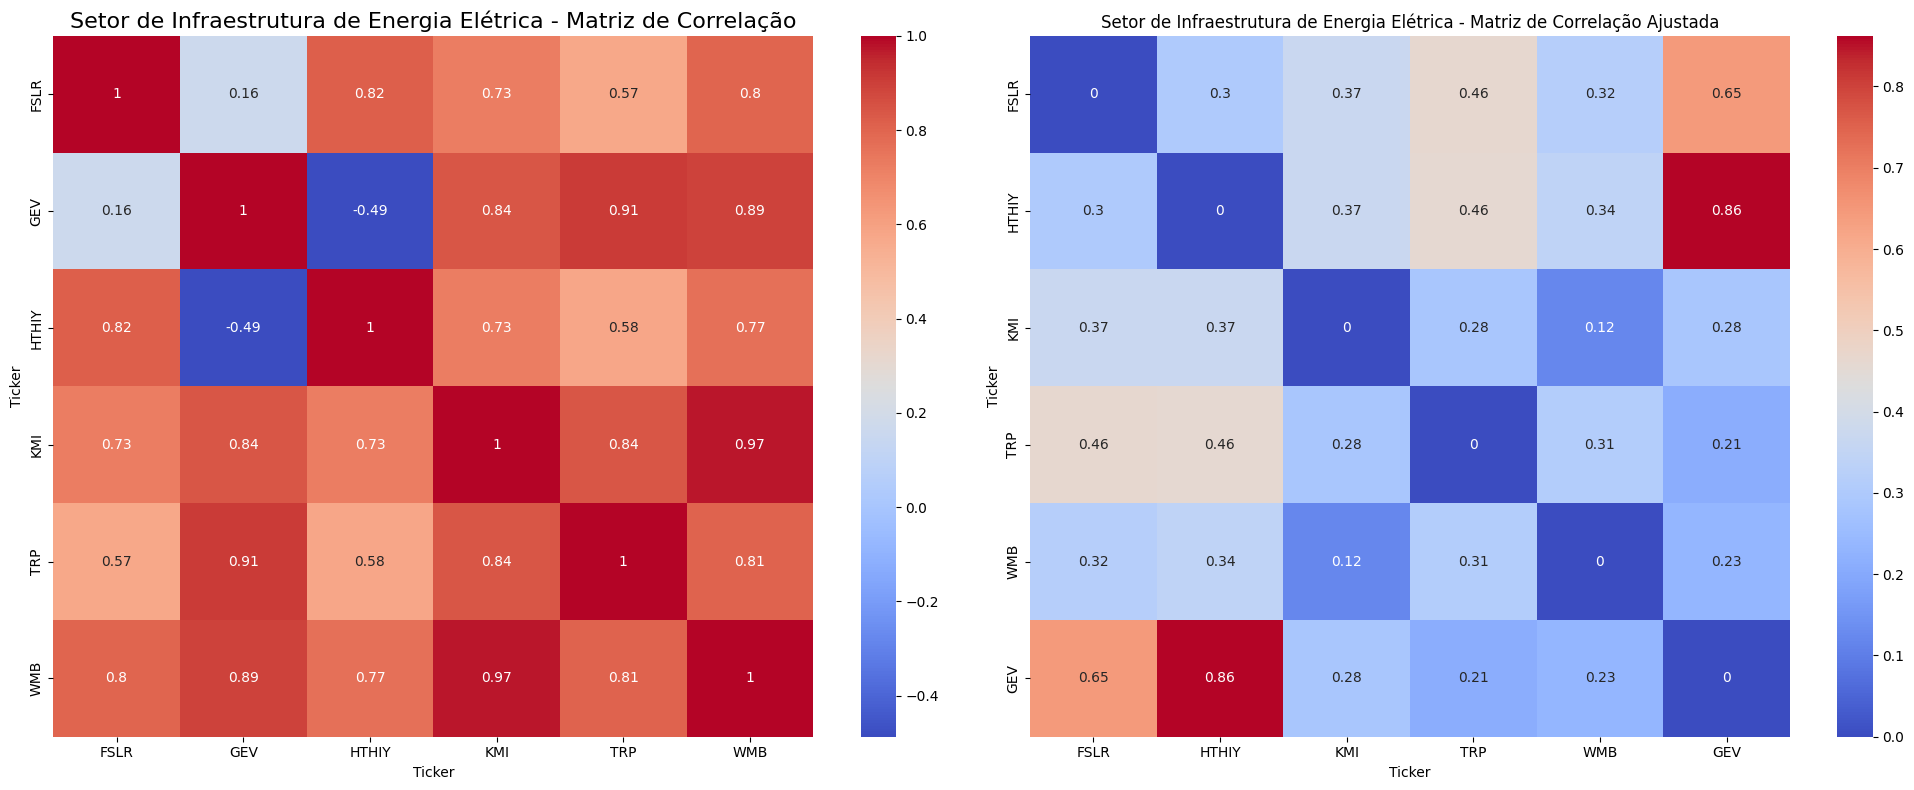

In [161]:
# Cria uma figura e uma grade de subplots 1x2
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Correlação das geradoras nucleares
sns.heatmap(df_infra_energia.corr(), ax=axs[0], annot=True, cmap='coolwarm');
axs[0].set_title('Setor de Infraestrutura de Energia Elétrica - Matriz de Correlação', fontsize=16)

# Transformando a correlação em uma métrica
metrica = df_infra_energia.corr().apply(lambda x: np.sqrt(0.5 * (1 - x)))
metrica = metrica.dropna()

# Utilizando a função 'cluster_corr' que reorganiza a matriz de correlação, de modo que grupos de variáveis altamente correlacionadas fiquem próximas umas das outras
sns.heatmap(cluster_corr(metrica), ax=axs[1], annot=True, cmap='coolwarm');
axs[1].set_title('Setor de Infraestrutura de Energia Elétrica - Matriz de Correlação Ajustada')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [162]:
# Calculando o drawdown de cada ação do setor

# Calculando o retorno diário
ret_infra_energia = df_infra_energia.pct_change().dropna()

# Aplicando a função 'drawdown'
max_drawdown = ret_infra_energia.apply(drawdown, axis=0)

# Filtrando os drawdowns dos maiores p/ os menores
max_drawdown = max_drawdown.sort_values(ascending=True) * 100

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_drawdown.index,
    y=max_drawdown.values
))

fig.update_layout(
    title_text='Setor de Infraestrutura de Energia Elétrica - Drawdown',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [163]:
# Impacto do tarifaço do Trump (movimento de Janeiro a Abril de 2025)
# No final de Abril/25, Trump começou a falar que as tarifas vão diminuir, principalmente na China
lst_pct_change_tarifaco = []

for empresa in df_infra_energia.columns:
    preco_max_tarifaco = round(df_infra_energia.loc['2025-01':'2025-04', empresa].max(), 2)
    preco_min_tarifaco = round(df_infra_energia.loc['2025-01':'2025-04', empresa].min(), 2)
    pct_change_tarifaco = round(((preco_min_tarifaco / preco_max_tarifaco) - 1) * 100, 2)
    lst_pct_change_tarifaco.append(pct_change_tarifaco)

df_pct_change_tarifaco = pd.DataFrame(lst_pct_change_tarifaco, index=df_infra_energia.columns, columns=['pct_change'])
df_pct_change_tarifaco = df_pct_change_tarifaco.sort_values(by='pct_change')

# Plotando o movimento de baixa causado pelo tarifaço
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_pct_change_tarifaco.index,
    y=df_pct_change_tarifaco['pct_change']
))

fig.update_layout(
    title_text='Setor de Infraestrutura de Energia Elétrica - Variação Percentual do Tarifaço Trump',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [164]:
# Calculando o retorno diário
ret_infra_energia = df_infra_energia.pct_change()

# Calculando o retorno acumulado
ret_accum = (1 + ret_infra_energia).cumprod()

# Primeiro dia começa em 1
ret_accum.iloc[0] = 1

# Plotando o retorno acumulado
fig = go.Figure()

for empresa in ret_accum:
    fig.add_trace(go.Scatter(
        x=ret_accum.index,
        y=ret_accum[empresa],
        name=empresa
    ))

fig.update_layout(
    height=700,
    width=1000,
    title_text='Setor de Infraestrutura de Energia Elétrica - Retorno Acumulado',
    template='seaborn'
)

fig.show()

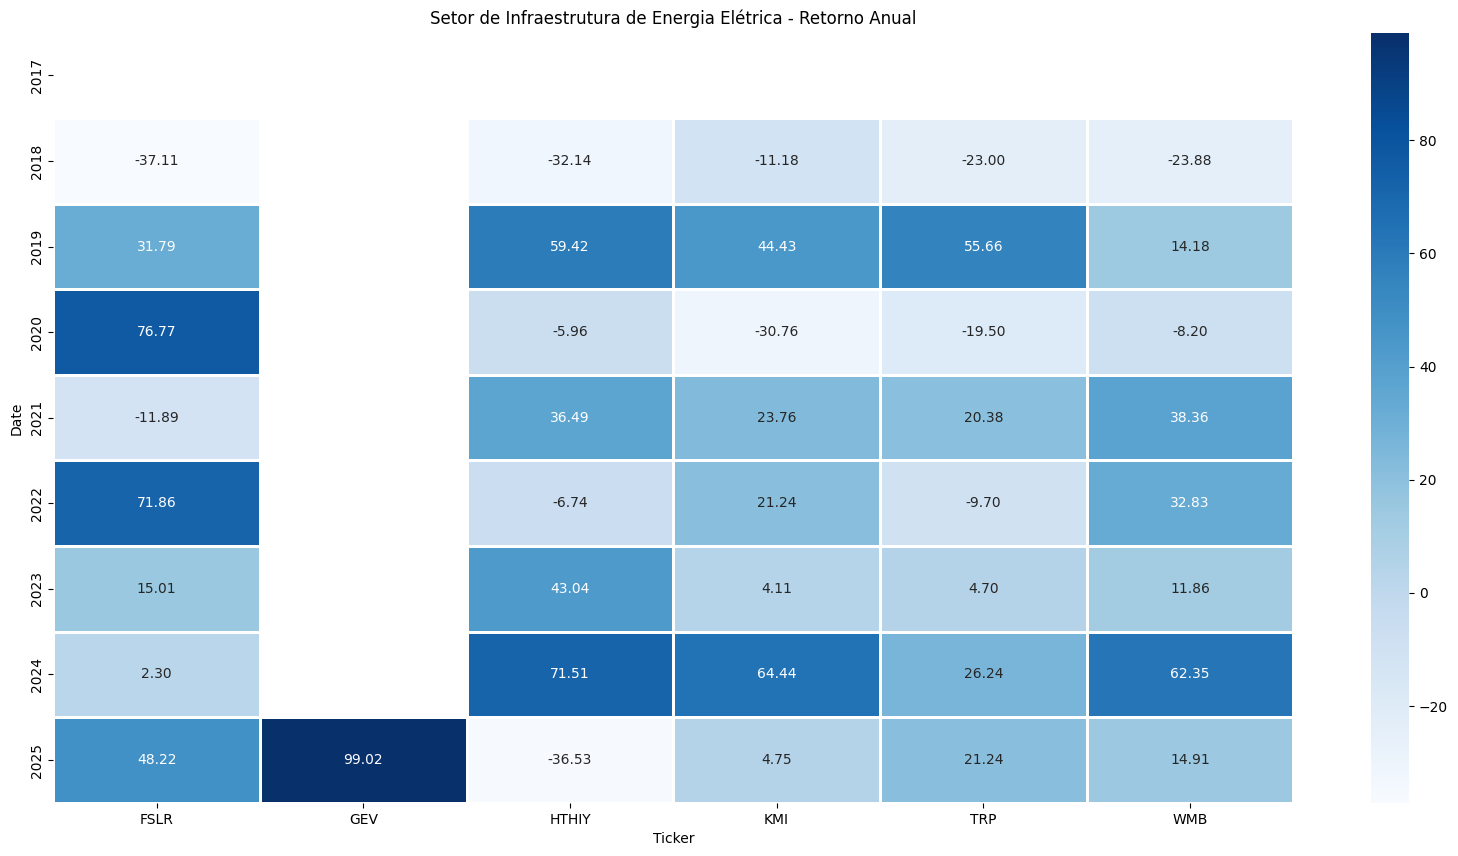

In [165]:
# Selecionando o último preço de cada ano e retirando o ano vigente
df_infra_energia_anual = df_infra_energia.groupby(df_infra_energia.index.year).last().drop(df_infra_energia.index.year.unique()[-1])

# Calculando o retorno anual
df_ret_anual_infra_energia = ((df_infra_energia_anual / df_infra_energia_anual.shift(1)) - 1) * 100

# Arrendondamento das casas decimais
df_ret_anual_infra_energia = df_ret_anual_infra_energia.round(2)

plt.figure(figsize=(20, 10))
sns.heatmap(df_ret_anual_infra_energia, annot=True, cmap='Blues', fmt='.2f', linewidths=0.8)
plt.title('Setor de Infraestrutura de Energia Elétrica - Retorno Anual')
plt.show()

In [166]:
# Plotando os histogramas dos retornos logarítmicos
plot_indicators_subplot_histogram(df_setor=df_infra_energia, setor='infraestrutura')

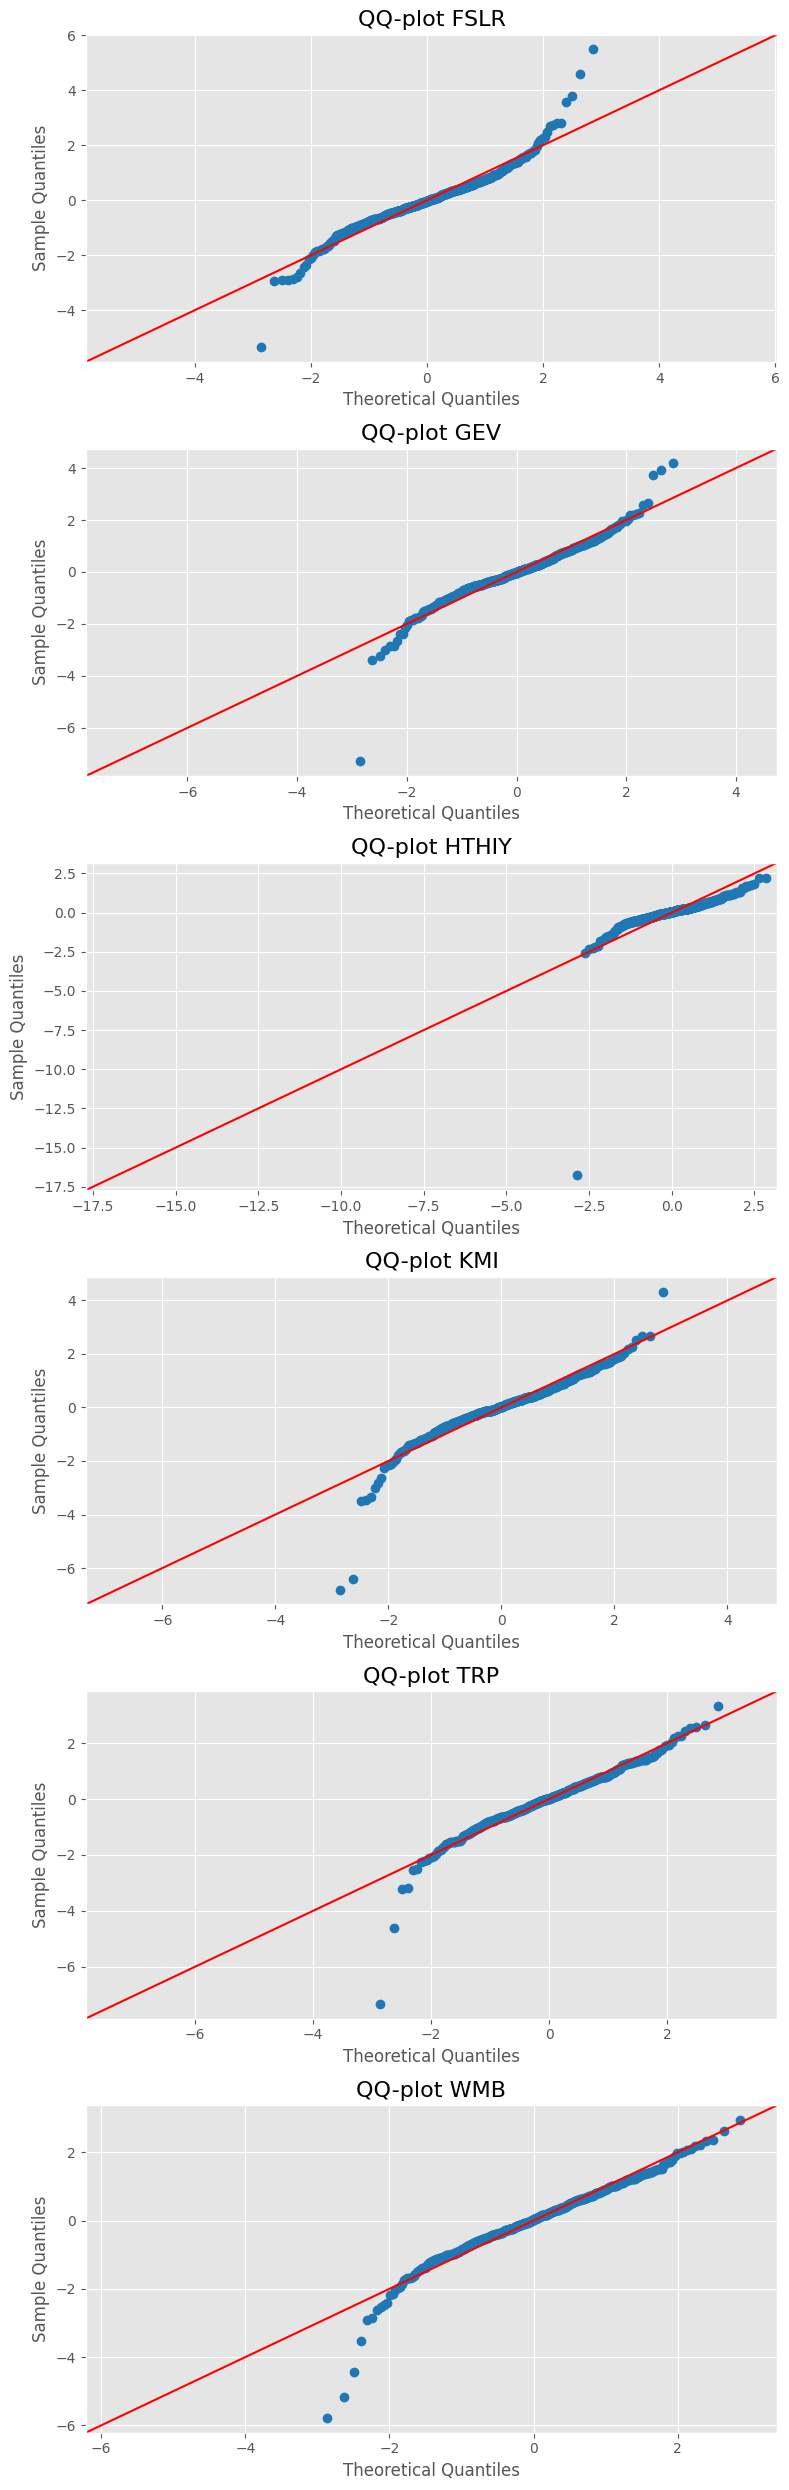

In [167]:
# Plot do qqplot das empresas
qqplot = subplot_qqplot(df_setor=df_infra_energia)
qqplot

In [168]:
# Retirando os NaN
df_eua_infra_energia_copy = df_infra_energia.dropna()

# Número de anos
num_years = len(df_eua_infra_energia_copy.index.year.unique())

# Calculando o CAGR (Compound Annual Growth Rate)
fslr_cagr = round(cagr(start_value=df_eua_infra_energia_copy.loc[:, 'FSLR'].iloc[0], end_value=df_eua_infra_energia_copy.loc[:, 'FSLR'].iloc[-1], num_periods=num_years) * 100, 2)
gev_cagr = round(cagr(start_value=df_eua_infra_energia_copy.loc[:, 'GEV'].iloc[0], end_value=df_eua_infra_energia_copy.loc[:, 'GEV'].iloc[-1], num_periods=num_years) * 100, 2)
hthiy_cagr = round(cagr(start_value=df_eua_infra_energia_copy.loc[:, 'HTHIY'].iloc[0], end_value=df_eua_infra_energia_copy.loc[:, 'HTHIY'].iloc[-1], num_periods=num_years) * 100, 2)
kmi_cagr = round(cagr(start_value=df_eua_infra_energia_copy.loc[:, 'KMI'].iloc[0], end_value=df_eua_infra_energia_copy.loc[:, 'KMI'].iloc[-1], num_periods=num_years) * 100, 2)
trp_cagr = round(cagr(start_value=df_eua_infra_energia_copy.loc[:, 'TRP'].iloc[0], end_value=df_eua_infra_energia_copy.loc[:, 'TRP'].iloc[-1], num_periods=num_years) * 100, 2)
wmb_cagr = round(cagr(start_value=df_eua_infra_energia_copy.loc[:, 'WMB'].iloc[0], end_value=df_eua_infra_energia_copy.loc[:, 'WMB'].iloc[-1], num_periods=num_years) * 100, 2)

# Juntando todas os CAGR em um df
df_cagr = pd.DataFrame({
    'FSLR':fslr_cagr,
    'GEV':gev_cagr,
    'HTHIY':hthiy_cagr,
    'KMI':kmi_cagr,
    'TRP':trp_cagr,
    'WMB':wmb_cagr
}, index=[num_years])

# Transpondo o df
df_cagr = df_cagr.T
df_cagr.columns = ['cagr']

# Plotando o cagr
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_cagr.index,
    y=df_cagr['cagr'],
))

fig.update_layout(
    title_text=f'Setor de Infraestrutura de Energia Elétrica - CAGR de {num_years} anos',
    template='seaborn'
)

fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


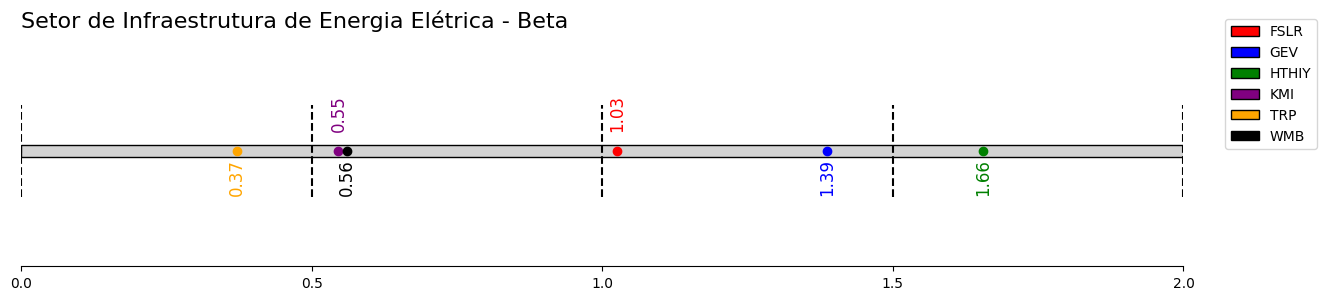

In [169]:
# Calculando o beta das empresas
beta_fslr, model_fslr = calculate_beta(index='^GSPC', stock='FSLR', period='3y', interval='1wk')
beta_gev, model_gev = calculate_beta(index='^GSPC', stock='GEV', period='3y', interval='1wk')
beta_hthiy, model_hthiy = calculate_beta(index='^GSPC', stock='HTHIY', period='3y', interval='1wk')
beta_kmi, model_kmi = calculate_beta(index='^GSPC', stock='KMI', period='3y', interval='1wk')
beta_trp, model_trp = calculate_beta(index='^GSPC', stock='TRP', period='3y', interval='1wk')
beta_wmb, model_wmb = calculate_beta(index='^GSPC', stock='WMB', period='3y', interval='1wk')

# Juntando em um dicionário
dict_beta = {   
    'FSLR':beta_fslr, 
    'GEV':beta_gev, 
    'HTHIY':beta_hthiy, 
    'KMI':beta_kmi, 
    'TRP':beta_trp,
    'WMB':beta_wmb
}

# Transformando em um DataFrame
df_beta = pd.DataFrame(list(dict_beta.items()), columns=['Empresa', 'Beta'])

# Plot dos betas das empresas em uma linha horizontal ('régua')
cores_beta = [
    'red', 
    'blue', 
    'green', 
    'purple', 
    'orange',
    'black'
]

# Valores de 0 a 10 com passos de 0.5 da régua
valores = np.arange(0, 10, 0.5)  

# Tamanho do plot
fig, ax = plt.subplots(figsize=(15, 3))
# Adicionando um título ao gráfico
ax.set_title('Setor de Infraestrutura de Energia Elétrica - Beta', loc='left', fontsize=16)
# Criando uma barra horizontal que representa a régua
ax.barh(y=0, width=100, height=0.1, color='lightgrey', edgecolor='black')

# Adicionando ticks e labels
ax.set_xticks(valores)
ax.set_xticklabels(valores)
ax.set_yticks([])  # Remove y-ticks
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)

# Adicionando linhas verticais para cada valor (ticks da régua)
for valor in valores:
    ax.axvline(valor, color='black', linestyle='--', ymin=0.3, ymax=0.7)

# Removendo o eixo y
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Adicionando números de beta acima e abaixo da linha horizontal
for i, (beta, empresa, cor) in enumerate(zip(df_beta['Beta'], df_beta['Empresa'], cores_beta)):
    ax.plot(beta, 0, 'o', color=cor)
    # Ajustando a posição vertical dos números de beta
    if i % 3 == 0:
        offset = 0.2
    else:
        offset = -0.35
    ax.text(beta, offset, f'{beta:.2f}', ha='center', color=cor, fontsize=12, rotation=90)  # Rótulo do beta acima ou abaixo da linha

# Criando uma legenda manualmente
handles = [Patch(facecolor=cor, edgecolor='black') for cor in cores_beta]
ax.legend(handles, df_beta['Empresa'], loc='upper left', bbox_to_anchor=(1.03, 1.1))

plt.show()

In [170]:
# Plotando o grafico da relação risco x retorno
plot_risk_return(df_setor=df_infra_energia, setor='infraestrutura')

In [171]:
# VaR histórico
df_var_hist = VaR(df_setor=df_infra_energia)[0]

# Plotando o VaR histórico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_90'],
    name='VaR_hist_90'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_95'],
    name='VaR_hist_95'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_99'],
    name='VaR_hist_99'
))

fig.update_layout(
    title='Setor de Infraestrutura de Energia Elétrica - VaR Histórico'
)

fig.show()

In [172]:
# VaR paramétrico (gaussiano)
df_var_param = VaR(df_infra_energia)[1]

# Plotando o VaR paramétrico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_90'],
    name='VaR_param_90'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_95'],
    name='VaR_param_95'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_99'],
    name='VaR_param_99'
))

fig.update_layout(
    title='Setor de Infraestrutura de Energia Elétrica - VaR Paramétrico'
)

fig.show()

In [173]:
# CVaR ou Expected Shortfall
df_cvar = CVaR(df_setor=df_infra_energia)

# Plotando o CVaR 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_90'],
    name='CVaR_90'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_95'],
    name='CVaR_95'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_99'],
    name='CVaR_99'
))

fig.update_layout(
    title='Setor de Infraestrutura de Energia Elétrica - CVaR'
)

fig.show()

In [174]:
# VaR e CVaR - utilizando a distribuição student-t
var_cvar_t_90 = VaR_CVaR_scipy(df_setor=df_infra_energia, num_alpha=0.1, tipo_distrib='student-t')
var_cvar_t_95 = VaR_CVaR_scipy(df_setor=df_infra_energia, num_alpha=0.05, tipo_distrib='student-t')
var_cvar_t_99 = VaR_CVaR_scipy(df_setor=df_infra_energia, num_alpha=0.01, tipo_distrib='student-t')

# Plotando o VaR e CVaR - distribuição student-t
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'VaR e CVaR 90 - distribuição student-t',
        'VaR e CVaR 95 - distribuição student-t',
        'VaR e CVaR 99 - distribuição student-t'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['VaR_t_90'],
    name='VaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['CVaR_t_90'],
    name='CVaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['VaR_t_95'],
    name='VaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['CVaR_t_95'],
    name='CVaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['VaR_t_99'],
    name='VaR_t_99'),
    col=1, row=3)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['CVaR_t_99'],
    name='CVaR_t_99'),
    col=1, row=3)

fig.update_layout(
    title='Setor de Infraestrutura de Energia Elétrica - distribuição student-t',
    height=900
)

fig.show()

In [175]:
# Retirandos os NaN do df
df_infra_energia_2 = df_infra_energia.dropna()

# Dicionário p/ criar um df dos coeficientes de Hurst
dict_hurst = {}

# Lista das lags
lst_lags = [20, 50, 100, 200, 500]

# Calculando o coefiente de Hurst
for empresa in df_infra_energia_2:
    lst_hurst = []
    for lag in lst_lags:
        hurst_exp = hurst_exponent(df_infra_energia_2[empresa].values, lag)
        hurst_exp = round(hurst_exp, 2)
        lst_hurst.append(hurst_exp)
    dict_hurst[empresa] = lst_hurst

# Criando um df a partir do dicionário
df_hurst = pd.DataFrame(dict_hurst, index=lst_lags)

# Transpondo o df
df_hurst = df_hurst.T

# Plotando o coeficiente de Hurst
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'Coeficiente de Hurst - lag 20',
        'Coeficiente de Hurst - lag 50',
        'Coeficiente de Hurst - lag 100'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[20],
    name='lag_20'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[50],
    name='lag_50'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[100],
    name='lag_100'),
    row=3, col=1
)

fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=1, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=2, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=3, col=1)

fig.update_layout(
    title='Setor de Infraestrutura de Energia Elétrica - Coeficiente de Hurst',
    height=900
)

fig.show()

c:\Users\PICHAU\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\PICHAU\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:178: RuntimeWarning:

invalid value encountered in divide

c:\Users\PICHAU\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:211: RuntimeWarning:

invalid value encountered in scalar divide

c:\B3\analise-fundamentalista\analise_eua\funcoes_eua.py:862: RuntimeWarning:

divide by zero encountered in log



# **The Mag(nificent) Seven**

## Indicadores Gerais

In [ ]:
# Apple, Amazon, Alphabet, Meta, Microsoft, Nvidia and Tesla
lst_tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

df_mag_seven = yf.download(lst_tickers, start='2007-01-01', auto_adjust=True, multi_level_index=False)['Close']

# Plotando os preços das empresas de semicondutores
fig = go.Figure()

for empresa in df_mag_seven:
    fig.add_trace(go.Scatter(
        x=df_mag_seven.index,
        y=df_mag_seven[empresa],
        name=empresa
))
    
fig.update_layout(
    height=700,
    width=1000,
    title_text='Mag(nificent Seven)',
    template='seaborn'
)

fig.show()

In [ ]:
# Retirando o NaN
df_mag_seven2 = df_mag_seven.dropna()

# Momentum de um ano   
momentum = df_mag_seven2 - df_mag_seven2.shift(252)

# Retirando o NaN
momentum = momentum.dropna()

# Plotando o momentum
fig = go.Figure()
for empresa in momentum:
    fig.add_trace(go.Scatter(
        x=momentum.index,
        y=momentum[empresa],
        name=empresa
    ))

fig.add_hline(y=0, line=dict(color='red', width=1))

fig.update_layout(
    title_text='Mag(nificent Seven) - Momentum',
    template='seaborn',
)
fig.show()

In [ ]:
# Calculando a volatilidade anualizada de cada ação 
vol_anual = round(volatilidade(df=df_mag_seven, ticker=lst_tickers, ano='2025')[0] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_mensal = round(volatilidade(df=df_mag_seven, ticker=lst_tickers, ano='2025')[1] * 100, 2)

# Calculando a volatilidade mensal de cada ação 
vol_semanal = round(volatilidade(df=df_mag_seven, ticker=lst_tickers, ano='2025')[2] * 100, 2)

# Juntando todas as volatilidades em um df
df_volatilidade = pd.DataFrame({
    'vol_anual': [vol_anual], 
    'vol_mensal': [vol_mensal], 
    'vol_semanal': [vol_semanal]
})

# Plotando as volatilidades
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_volatilidade.columns,
    y=df_volatilidade.values[0]
))

fig.update_layout(
    title_text='Mag(nificent Seven) - Volatilidade',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Gráfico da volatilidade histórica ao longo do tempo

# Calculando o retorno logarítmico
log_return = np.log(df_mag_seven.loc['2021':'2025', lst_tickers] / df_mag_seven.loc['2021':'2025', lst_tickers].shift(1))  #usar o dropna() se o gráfico ficar com "buracos" entre os anos.

# Calculando a volatilidade média móvel de 60
volatilidade_movel = log_return.rolling(window=60).std()*np.sqrt(60)

# Retirando o NaN
volatilidade_movel = volatilidade_movel.dropna()

px.line(data_frame=volatilidade_movel, 
        x=volatilidade_movel.index, 
        y=volatilidade_movel.columns).update_layout(
            title='Mag(nificent Seven) - Evolução da Volatilidade Móvel', 
            xaxis_title='Anos', 
            yaxis_title='Volatilidade', 
            template='seaborn'
)

In [ ]:
# Cria uma figura e uma grade de subplots 1x2
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Correlação das Mag(nificent Seven)
sns.heatmap(df_mag_seven.corr(), ax=axs[0], annot=True, cmap='coolwarm');
axs[0].set_title('Mag(nificent Seven) - Matriz de Correlação', fontsize=16)

# Transformando a correlação em uma métrica
metrica = df_mag_seven.corr().apply(lambda x: np.sqrt(0.5 * (1 - x)))
metrica = metrica.dropna()

# Utilizando a função 'cluster_corr' que reorganiza a matriz de correlação, de modo que grupos de variáveis altamente correlacionadas fiquem próximas umas das outras
sns.heatmap(cluster_corr(metrica), ax=axs[1], annot=True, cmap='coolwarm');
axs[1].set_title('Mag(nificent Seven) - Matriz de Correlação Ajustada')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Calculando o drawdown de cada ação do setor

# Calculando o retorno diário
ret_mag_seven = df_mag_seven.pct_change().dropna()

# Aplicando a função 'drawdown'
max_drawdown = ret_mag_seven.apply(drawdown, axis=0)

# Filtrando os drawdowns dos maiores p/ os menores
max_drawdown = max_drawdown.sort_values(ascending=True) * 100

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=max_drawdown.index,
    y=max_drawdown.values
))

fig.update_layout(
    title_text='Mag(nificent Seven) - Drawdown',
    template='seaborn',
    showlegend=False   
)

fig.show()

In [ ]:
# Calculando o retorno acumulado
ret_accum = (1 + ret_mag_seven).cumprod()

# Primeiro dia começa em 1
ret_accum.iloc[0] = 1

# Plotando o retorno acumulado
fig = go.Figure()

for empresa in ret_accum:
    fig.add_trace(go.Scatter(
        x=ret_accum.index,
        y=ret_accum[empresa],
        name=empresa
    ))

fig.update_layout(
    height=700,
    width=1000,
    title_text='Mag(nificent Seven) - Retorno Acumulado',
    template='seaborn'
)

fig.show()

In [ ]:
# Calculando o retorno anual

# Ano atual para calcular o retorno do ano anterior
ano_atual = 2026

# No range(ano_inicial + 1, 2023), eu estou adiciando +1, pq caso o papel selecionado em seu 1º ano de negociação não comece em janeiro, eu começo no seu 2º ano que começa em Janeiro
aapl_ret = [round(((df_mag_seven.loc[f'{ano}-12','AAPL'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','AAPL'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]
amzn_ret = [round(((df_mag_seven.loc[f'{ano}-12','AMZN'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','AMZN'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]
googl_ret = [round(((df_mag_seven.loc[f'{ano}-12','GOOGL'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','GOOGL'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]
meta_ret = [round(((df_mag_seven.loc[f'{ano}-12','META'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','META'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]
msft_ret = [round(((df_mag_seven.loc[f'{ano}-12','MSFT'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','MSFT'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]
nvda_ret = [round(((df_mag_seven.loc[f'{ano}-12','NVDA'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','NVDA'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]
tsla_ret = [round(((df_mag_seven.loc[f'{ano}-12','TSLA'].iloc[-1] / df_mag_seven.loc[f'{ano}-01','TSLA'].iloc[0])-1)*100, 2) for ano in range(df_mag_seven.index[0].year+1, ano_atual)]

# Lista dos anos negociados p/ se tornar o index do df
lista_anos_idx = [ano for ano in range(df_mag_seven.index[0].year+1, ano_atual)]

# Criando o df dos retornos anuais
df_ret_us = pd.DataFrame({
    'Apple': aapl_ret,
    'Amazon': amzn_ret,
    'Google': googl_ret,
    'Meta': meta_ret,
    'Microsoft': msft_ret,
    'Nvida': nvda_ret,
    'Tesla': tsla_ret},  
    index=lista_anos_idx
)
 
plt.figure(figsize=(20, 10))
sns.heatmap(df_ret_us, annot=True, cmap='Blues', fmt=".2f", linewidths=0.8)
plt.title('Mag(nificent Seven) - Retorno Anual')
plt.show()

In [ ]:
# Plotando os histogramas dos retornos logarítmicos
plot_indicators_subplot_histogram(df_setor=df_mag_seven, setor='Mag(nificent Seven)')

In [ ]:
# Plot do qqplot das empresas
qqplot = subplot_qqplot(df_setor=df_mag_seven)
qqplot

In [ ]:
# Fazendo uma cópia do df
df_copy = df_mag_seven.copy()

# Retirando os NaN para que a data inicial seja igual para todas as empresas
df_copy = df_copy.dropna()

# Número de anos
num_years = len(df_copy.index.year.unique())

# Calculando o CAGR (Compound Annual Growth Rate)
aapl_cagr = round(cagr(start_value=df_copy.loc[:, 'AAPL'].iloc[0], end_value=df_copy.loc[:, 'AAPL'].iloc[-1], num_periods=num_years) * 100, 2)
amzn_cagr = round(cagr(start_value=df_copy.loc[:, 'AMZN'].iloc[0], end_value=df_copy.loc[:, 'AMZN'].iloc[-1], num_periods=num_years) * 100, 2)
googl_cagr = round(cagr(start_value=df_copy.loc[:, 'GOOGL'].iloc[0], end_value=df_copy.loc[:, 'GOOGL'].iloc[-1], num_periods=num_years) * 100, 2)
meta_cagr = round(cagr(start_value=df_copy.loc[:, 'META'].iloc[0], end_value=df_copy.loc[:, 'META'].iloc[-1], num_periods=num_years) * 100, 2)
msft_cagr = round(cagr(start_value=df_copy.loc[:, 'MSFT'].iloc[0], end_value=df_copy.loc[:, 'MSFT'].iloc[-1], num_periods=num_years) * 100, 2)
nvda_cagr = round(cagr(start_value=df_copy.loc[:, 'NVDA'].iloc[0], end_value=df_copy.loc[:, 'NVDA'].iloc[-1], num_periods=num_years) * 100, 2)
tsla_cagr = round(cagr(start_value=df_copy.loc[:, 'TSLA'].iloc[0], end_value=df_copy.loc[:, 'TSLA'].iloc[-1], num_periods=num_years) * 100, 2)

# Juntando todas os CAGR em um df
df_cagr = pd.DataFrame({
    'Apple':aapl_cagr,
    'Amazon':amzn_cagr,
    'Google':googl_cagr,
    'Meta':meta_cagr,
    'Microsft':msft_cagr,
    'Nvidia':nvda_cagr,
    'Tesla':tsla_cagr}, 
    index=[num_years]
)

# Transpondo o df
df_cagr = df_cagr.T
df_cagr.columns = ['cagr']

# Plotando o cagr
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_cagr.index,
    y=df_cagr['cagr'],
))

fig.update_layout(
    title_text=f'Mag(nificent Seven) - CAGR de {num_years} anos',
    template='seaborn'
)

fig.show()

In [ ]:
# Calculando o beta das empresas
beta_aapl, model_aapl = calculate_beta(index='^GSPC', stock='AAPL', period='3y', interval='1wk')
beta_amzn, model_amzn = calculate_beta(index='^GSPC', stock='AMZN', period='3y', interval='1wk')
beta_googl, model_googl = calculate_beta(index='^GSPC', stock='GOOGL', period='3y', interval='1wk')
beta_meta, model_meta = calculate_beta(index='^GSPC', stock='META', period='3y', interval='1wk')
beta_msft, model_msft = calculate_beta(index='^GSPC', stock='MSFT', period='3y', interval='1wk')
beta_nvda, model_nvda = calculate_beta(index='^GSPC', stock='NVDA', period='3y', interval='1wk')
beta_tsla, model_tsla = calculate_beta(index='^GSPC', stock='TSLA', period='3y', interval='1wk')

# Juntando em um dicionário
dict_beta = {   
    'Apple':beta_aapl, 
    'Amazon':beta_amzn, 
    'Google':beta_googl, 
    'Meta':beta_meta, 
    'Microsft':beta_msft, 
    'Nvidia':beta_nvda, 
    'Tesla':beta_tsla
}

# Transformando em um DataFrame
df_beta = pd.DataFrame(list(dict_beta.items()), columns=['Empresa', 'Beta'])

# Plot dos betas das empresas em uma linha horizontal ('régua')
cores_beta = ['red', 'blue', 'green', 'purple', 'orange', 'salmon', 'darkcyan']
valores = np.arange(0, 10, 0.25)  # Valores de 0 a 10 com passos de 1

# Tamanho do plot
fig, ax = plt.subplots(figsize=(15, 3))
# Adicionando um título ao gráfico
ax.set_title('Empresas Mag(nificent Seven) - Beta', loc='left', fontsize=16)
# Criando uma barra horizontal que representa a régua
ax.barh(y=0, width=100, height=0.1, color='lightgrey', edgecolor='black')

# Adicionando ticks e labels
ax.set_xticks(valores)
ax.set_xticklabels(valores)
ax.set_yticks([])  # Remove y-ticks
ax.set_xlim(0, 3)
ax.set_ylim(-1, 1)

# Adicionando linhas verticais para cada valor (ticks da régua)
for valor in valores:
    ax.axvline(valor, color='black', linestyle='--', ymin=0.3, ymax=0.7)

# Removendo o eixo y
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Adicionando números de beta acima e abaixo da linha horizontal
for i, (beta, empresa, cor) in enumerate(zip(df_beta['Beta'], df_beta['Empresa'], cores_beta)):
    ax.plot(beta, 0, 'o', color=cor)
    # Ajustando a posição vertical dos números de beta
    if i % 3 == 0:
        offset = 0.2
    else:
        offset = -0.4
    ax.text(beta, offset, f'{beta:.2f}', ha='center', color=cor, fontsize=12, rotation=90)  # Rótulo do beta acima ou abaixo da linha

# Criando uma legenda manualmente
handles = [Patch(facecolor=cor, edgecolor='black') for cor in cores_beta]
ax.legend(handles, df_beta['Empresa'], loc='upper left', bbox_to_anchor=(1.03, 1.1))

# Exibir o gráfico
plt.show()

In [ ]:
# Plotando o grafico da relação risco x retorno
plot_risk_return(df_setor=df_mag_seven, setor='Mag(nificent Seven)')

In [ ]:
# VaR histórico
df_var_hist = VaR(df_setor=df_mag_seven)[0]

# Plotando o VaR histórico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_90'],
    name='VaR_hist_90'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_95'],
    name='VaR_hist_95'
))

fig.add_trace(go.Scatter(
    x=df_var_hist.index,
    y=df_var_hist['VaR_hist_99'],
    name='VaR_hist_99'
))

fig.update_layout(
    title='Mag(nificent Seven) - VaR Histórico'
)

fig.show()

In [ ]:
# VaR paramétrico (gaussiano)
df_var_param = VaR(df_setor=df_mag_seven)[1]

# Plotando o VaR paramétrico
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_90'],
    name='VaR_param_90'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_95'],
    name='VaR_param_95'
))

fig.add_trace(go.Scatter(
    x=df_var_param.index,
    y=df_var_param['VaR_param_99'],
    name='VaR_param_99'
))

fig.update_layout(
    title='Mag(nificent Seven) - VaR Paramétrico'
)

fig.show()

In [ ]:
# CVaR ou Expected Shortfall
df_cvar = CVaR(df_setor=df_mag_seven)

# Plotando o CVaR 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_90'],
    name='CVaR_90'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_95'],
    name='CVaR_95'
))

fig.add_trace(go.Scatter(
    x=df_cvar.index,
    y=df_cvar['CVaR_99'],
    name='CVaR_99'
))

fig.update_layout(
    title='Mag(nificent Seven) - CVaR'
)

fig.show()

In [ ]:
# VaR e CVaR - utilizando a distribuição student-t
var_cvar_t_90 = VaR_CVaR_scipy(df_setor=df_mag_seven, num_alpha=0.1, tipo_distrib='student-t')
var_cvar_t_95 = VaR_CVaR_scipy(df_setor=df_mag_seven, num_alpha=0.05, tipo_distrib='student-t')
var_cvar_t_99 = VaR_CVaR_scipy(df_setor=df_mag_seven, num_alpha=0.01, tipo_distrib='student-t')

# Plotando o VaR e CVaR - distribuição student-t
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'VaR e CVaR 90 - distribuição student-t',
        'VaR e CVaR 95 - distribuição student-t',
        'VaR e CVaR 99 - distribuição student-t'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['VaR_t_90'],
    name='VaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_90.index,
    y=var_cvar_t_90['CVaR_t_90'],
    name='CVaR_t_90'),
    col=1, row=1)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['VaR_t_95'],
    name='VaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_95.index,
    y=var_cvar_t_95['CVaR_t_95'],
    name='CVaR_t_95'),
    col=1, row=2)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['VaR_t_99'],
    name='VaR_t_99'),
    col=1, row=3)

fig.add_trace(go.Scatter(
    x=var_cvar_t_99.index,
    y=var_cvar_t_99['CVaR_t_99'],
    name='CVaR_t_99'),
    col=1, row=3)

fig.update_layout(
    title='Mag(nificent Seven) - distribuição student-t',
    height=900
)

fig.show()

In [ ]:
# Retirandos os NaN do df
df_mag_seven2 = df_mag_seven.dropna()

# Dicionário p/ criar um df dos coeficientes de Hurst
dict_hurst = {}

# Lista das lags
lst_lags = [20, 50, 100, 200, 500]

# Calculando o coefiente de Hurst
for empresa in df_mag_seven2:
    lst_hurst = []
    for lag in lst_lags:
        hurst_exp = hurst_exponent(df_mag_seven2[empresa].values, lag)
        hurst_exp = round(hurst_exp, 2)
        lst_hurst.append(hurst_exp)
    dict_hurst[empresa] = lst_hurst

# Criando um df a partir do dicionário
df_hurst = pd.DataFrame(dict_hurst, index=lst_lags)

# Transpondo o df
df_hurst = df_hurst.T

# Plotando o coeficiente de Hurst
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'Coeficiente de Hurst - lag 20',
        'Coeficiente de Hurst - lag 50',
        'Coeficiente de Hurst - lag 100'),
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[20],
    name='lag_20'),
    row=1, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[50],
    name='lag_50'),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    x=df_hurst.index,
    y=df_hurst[100],
    name='lag_100'),
    row=3, col=1
)

fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=1, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=2, col=1)
fig.add_hline(y=0.5, line_width=0.5, line_color='red', row=3, col=1)

fig.update_layout(
    title='Mag(nificent Seven) - Coeficiente de Hurst',
    height=900
)

fig.show()

## Indicadores Fundamentalistas

In [ ]:
# Lendo os arquivos excel 10-K
df_amzn_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//amazon//amzn_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_aapl_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//apple//aapl_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_googl_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//google//googl_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_meta_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//meta//meta_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

df_msft_fundamental_indicators = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//microsoft//msft_indicators.xlsx',
    sheet_name='indicators_10k',
    index_col='Unnamed: 0',
)

# Lendo os arquivos excel 10-Q
df_amzn_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//amazon//amzn_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_aapl_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//apple//aapl_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_googl_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//google//googl_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_meta_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//meta//meta_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

df_msft_fundamental_indicators_10q = pd.read_excel(
    'C://B3//analise-fundamentalista//analise_eua//tecnologia//microsoft//msft_indicators.xlsx',
    sheet_name='indicators_10q',
    index_col='Unnamed: 0',
)

In [ ]:
# Lista que contém tuplas que possuem o nome da empresa e o seu df com os indicadores fundamentalistas
lst_empresas_10k = [
    ('Amazon', df_amzn_fundamental_indicators),
    ('Apple', df_aapl_fundamental_indicators),
    ('Google', df_googl_fundamental_indicators),
    ('Meta', df_meta_fundamental_indicators),
    ('Microsoft', df_msft_fundamental_indicators)
]

lst_empresas_10q = [
    ('Amazon', df_amzn_fundamental_indicators_10q),
    ('Apple', df_aapl_fundamental_indicators_10q),
    ('Google', df_googl_fundamental_indicators_10q),
    ('Meta', df_meta_fundamental_indicators_10q),
    ('Microsoft', df_msft_fundamental_indicators_10q)
]

# Lista que contém os nomes dos indicadores fundamentalistas
indicadores_scatter = [
    'P/L Damodaran', 
    'P/L', 
    'L/P',
    'EBITDA', 
    'Margem Líquida',
    'P/VPA',
    'Dívida Líquida/EBITDA',
    'Dívida Líquida/PL',
    'EV/EBITDA',
    'ROE',
    'ROIC',
    'FCO',
    'Free Cash Flow',
    'Buyback'
]

indicadores_bar = [
    'Valor de Mercado',
    'Dívida Bruta',
    'Caixa e Equivalentes',
    'Dívida Líquida'
]

In [ ]:
# Plotando os indicadores fundamentalistas 10-k 
plot_indicators_subplot_scatter(
    ten_k=True, 
    lst_dfs=lst_empresas_10k, 
    indicadores=indicadores_scatter, 
    setor='tecnologia'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-q
plot_indicators_subplot_scatter(
    ten_k=False, 
    lst_dfs=lst_empresas_10q, 
    indicadores=indicadores_scatter, 
    setor='tecnologia'
)

In [ ]:
# Plotando os indicadores fundamentalistas 10-k 
plot_indicators_subplot_bar(
    lst_dfs=lst_empresas_10k, 
    indicadores=indicadores_bar, 
    setor='tecnologia'
)

In [ ]:
# Plotando o indicador 'Valor de Mercado' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Valor de Mercado',
    setor='tecnologia'
)

In [ ]:
# Plotando o indicador 'Dívida Bruta' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Dívida Bruta',
    setor='tecnologia'
)

In [ ]:
# Plotando o indicador 'Caixa e Equivalentes' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Caixa e Equivalentes',
    setor='tecnologia'
)

In [ ]:
# Plotando o indicador 'Dívida Líquida' das empresas 10-q
plot_only_indicators_subplot_bar(
    lst_dfs=lst_empresas_10q,
    indicador='Dívida Líquida',
    setor='tecnologia'
)